Import Library

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score


In [91]:
#import data
df = pd.read_csv('/content/application_train.csv')
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

Data Understanding

In [92]:
#check shape of the dataset
df.shape

(307511, 122)

In [93]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [94]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [96]:
df.describe(include='all')

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
count   3.075110e+05  307499.000000  ...     307511.000000    307511.000000   
unique           NaN            NaN  ...               NaN              NaN   
top              NaN            NaN  ...               NaN              NaN   
freq             NaN            NaN  ...               NaN              NaN   
mean    5.990260e+05   27108.573909  ...          0.008130         0.000595   
std     4.024908e+05   14493.737315  ...          0.089798         0.024387   
min     4.500000e+04    1615.500000  ...          0.000000         0.000000   
25%     2.700000e+05   16524.000000  ...          0.000000         0.000000   
50%     5.135310e+05   24903.000000  ...          0.000000         0.000000   
75%     8.086500e+05   34596.000000  ...          0.000000         0.000000   
max     4.050000e+06  258025.500000  ...          1.000000         1.000000   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
count     307511.000000    307511.000000              265992.000000   
unique              NaN              NaN                        NaN   
top                 NaN              NaN                        NaN   
freq                NaN              NaN                        NaN   
mean           0.000507         0.000335                   0.006402   
std            0.022518         0.018299                   0.083849   
min            0.000000         0.000000                   0.000000   
25%            0.000000         0.000000                   0.000000   
50%            0.000000         0.000000                   0.000000   
75%            0.000000         0.000000                   0.000000   
max            1.000000         1.000000                   4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
unique                       NaN                         NaN   
top                          NaN                         NaN   
freq                         NaN                         NaN   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000           

In [97]:
#cek persentase missing values di setiap kolom
missing_data = df.isnull().sum()
missing_percentage = (df.isnull().sum()/len(df))*100

missing_df = pd.DataFrame({
    'Missing Data': missing_data,
    'Percentage': missing_percentage.round(2).astype(str) + '%'
})

missing_df.sort_values(by='Percentage', ascending=False, inplace=True)
missing_df

Missing Data Percentage
COMMONAREA_MEDI                 214865     69.87%
COMMONAREA_AVG                  214865     69.87%
COMMONAREA_MODE                 214865     69.87%
NONLIVINGAPARTMENTS_MODE        213514     69.43%
NONLIVINGAPARTMENTS_AVG         213514     69.43%
...                                ...        ...
NAME_FAMILY_STATUS                   0       0.0%
NAME_EDUCATION_TYPE                  0       0.0%
NAME_INCOME_TYPE                     0       0.0%
AMT_ANNUITY                         12       0.0%
SK_ID_CURR                           0       0.0%

[122 rows x 2 columns]

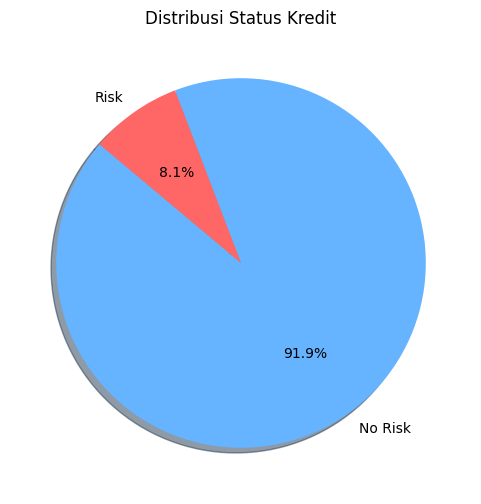

TARGET
0    282686
1     24825
Name: count, dtype: int64


In [98]:
target_counts = df['TARGET'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(target_counts, labels=['No Risk', 'Risk'], autopct='%1.1f%%', colors=['#66b3ff','#ff6666'], startangle=140, shadow=True)
plt.title('Distribusi Status Kredit')

# Menampilkan plot
plt.show()
print(target_counts)

 Ini menunjukkan bahwa dataset tidak seimbang (imbalanced) karena mayoritas data adalah kelas 0

In [99]:
object_cols = df.select_dtypes(include='object').columns
object_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [100]:
unique_counts = object_cols.nunique()
unique_counts

16

In [101]:
low_variance_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Kolom dengan hanya 1 nilai unik (tidak informatif):")
print(low_variance_cols)

Kolom dengan hanya 1 nilai unik (tidak informatif):
[]


In [102]:
high_card_cols = [col for col in object_cols if df[col].nunique() > 10]
print("Kolom dengan lebih dari 10 nilai unik (high cardinality):")
print(high_card_cols)

Kolom dengan lebih dari 10 nilai unik (high cardinality):
['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']


Data Preprocessing

In [103]:
jumlah_missing = df.isnull().any().sum()
print(jumlah_missing)

67


In [104]:
#menghapus kolom dengan > 50% data null
def drop_columns(df):
  missing_percentage = (df.isnull().sum()/len(df))*100
  columns_to_drop = missing_percentage[missing_percentage > 50].index
  df.drop(columns=columns_to_drop, inplace=True)
  return df

df = drop_columns(df)

In [105]:
df.isnull().any().sum()

np.int64(26)

In [106]:
def input_missing_value(df):
  kolom_missing = df.columns[df.isnull().any()]

  for i in kolom_missing:
    if df[i].dtype == 'object':
      df[i].fillna(df[i].mode()[0], inplace = True)
    else:
      df[i].fillna(df[i].median(), inplace = True)
  return df

df = input_missing_value(df)

<ipython-input-106-e2126fcac69f>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(), inplace = True)
<ipython-input-106-e2126fcac69f>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [107]:
df.isnull().any().sum()

np.int64(0)

In [108]:
#cek data yang duplikat
df.duplicated().sum()

np.int64(0)

In [109]:
columns_with_xna_or_unknown = []

for col in df.columns:
    if df[col].dtype == 'object':
        if df[col].isin(['XNA', 'Unknown']).any():
            columns_with_xna_or_unknown.append(col)

print("Kolom yang mengandung 'XNA' atau 'Unknown':")
print(columns_with_xna_or_unknown)

Kolom yang mengandung 'XNA' atau 'Unknown':
['CODE_GENDER', 'NAME_FAMILY_STATUS', 'ORGANIZATION_TYPE']


In [110]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [111]:
df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [112]:
df['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry: type 1           1039
Hotel                       966
Electricity                 950
Industry: type 4            877
Trade: type 6               631
Industry: type 5            599
Insurance                   597
Telecom                     577
Emergency                   560
Industry: type 2            458
Advertising                 429
Realtor                     396
Culture                     379
Industry: type 12           369
Trade: type 1               348
Mobile                      317
Legal Services              305
Cleaning                    260
Transport: type 1           201
Industry: type 6            112
Industry: type 10           109
Religion                     85
Industry: type 13            67
Trade: type 4                64
Trade: type 5                49
Industry: type 8             24
Name: count, dtype: int64

In [113]:
df['CODE_GENDER'] = df['CODE_GENDER'].replace(['XNA'],df['CODE_GENDER'].mode()[0])
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].replace(['Unknown'],df['NAME_FAMILY_STATUS'].mode()[0])

In [114]:
columns_with_xna_or_unknown = []

for col in df.columns:
    if df[col].dtype == 'object':
        if df[col].isin(['XNA', 'Unknown']).any():
            columns_with_xna_or_unknown.append(col)

print("Kolom yang mengandung 'XNA' atau 'Unknown':")
print(columns_with_xna_or_unknown)

Kolom yang mengandung 'XNA' atau 'Unknown':
['ORGANIZATION_TYPE']


In [115]:
#menghapus kolom dengan banyak variabel dan tidak relevan
df = df.drop(columns = high_card_cols)

In [116]:
df = df.drop(columns = ['SK_ID_CURR'])

Kolom ID tidak mengandung informasi yang berguna untuk memprediksi variabel target. Bahkan bisa mengganggu model karena model bisa “tertipu” oleh ID yang unik tapi acak.

In [117]:
FLAG_DOCUMENT = [col for col in df.columns if 'FLAG_DOCUMENT' in col]
df.drop(columns = FLAG_DOCUMENT, axis=1, inplace=True)

In [118]:
df.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1         Cash loans           M            N               Y   
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           F            N               Y   
4       0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   ... DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE  \
0  ...                      2.0                      2.0   
1  ...                      0.0                      1.0   
2  ...                      0.0                      0.0   
3  ...                      0.0                      2.0   
4  ...                      0.0                      0.0   

  DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE AMT_REQ_CREDIT_BUREAU_HOUR  \
0                      2.0                -1134.0                        0.0   
1                      0.0                 -828.0                        0.0   
2                      0.0                 -815.0                        0.0   
3                      0.0                 -617.0                        0.0   
4                      0.0                -1106.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         1.0  
4                         0.0  

[5 rows x 58 columns]

In [119]:
x = df.drop(columns = 'TARGET')

In [120]:
num = x.select_dtypes(exclude='object')
num.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  ...  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0            -2120  ...                       2.0                       2.0   
1             -291  ...                       0.0                       1.0   
2            -2531  ...                       0.0                       0.0   
3            -2437  ...                       0.0                       2.0   
4            -3458  ...                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                 -1134.0   
1                       0.0                  -828.0   
2                       0.0                  -815.0   
3                       0.0                  -617.0   
4                       0.0                 -1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        0.0                         1.0  
4                        0.0                         0.0  

[5 rows x 46 columns]

In [121]:
negative_column = num.columns[(num < 0).any()].tolist()
num[negative_column] = num[negative_column] * -1
num.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  ...  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0             2120  ...                       2.0                       2.0   
1              291  ...                       0.0                       1.0   
2             2531  ...                       0.0                       0.0   
3             2437  ...                       0.0                       2.0   
4             3458  ...                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                  1134.0   
1                       0.0                   828.0   
2                       0.0                   815.0   
3                       0.0                   617.0   
4                       0.0                  1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        0.0                         1.0  
4                        0.0                         0.0  

[5 rows x 46 columns]

In [122]:
df_num = pd.DataFrame(num.nunique(), columns = ['Total_unique']).reset_index()
df_num = df_num.rename(columns = {'index' : 'Name_of_column'})

num_a = []
num_b = []
for i,y in enumerate(df_num.Name_of_column):
    if df_num['Total_unique'][i] > 2:
        num_a.append(y)
    else:
        num_b.append(y)

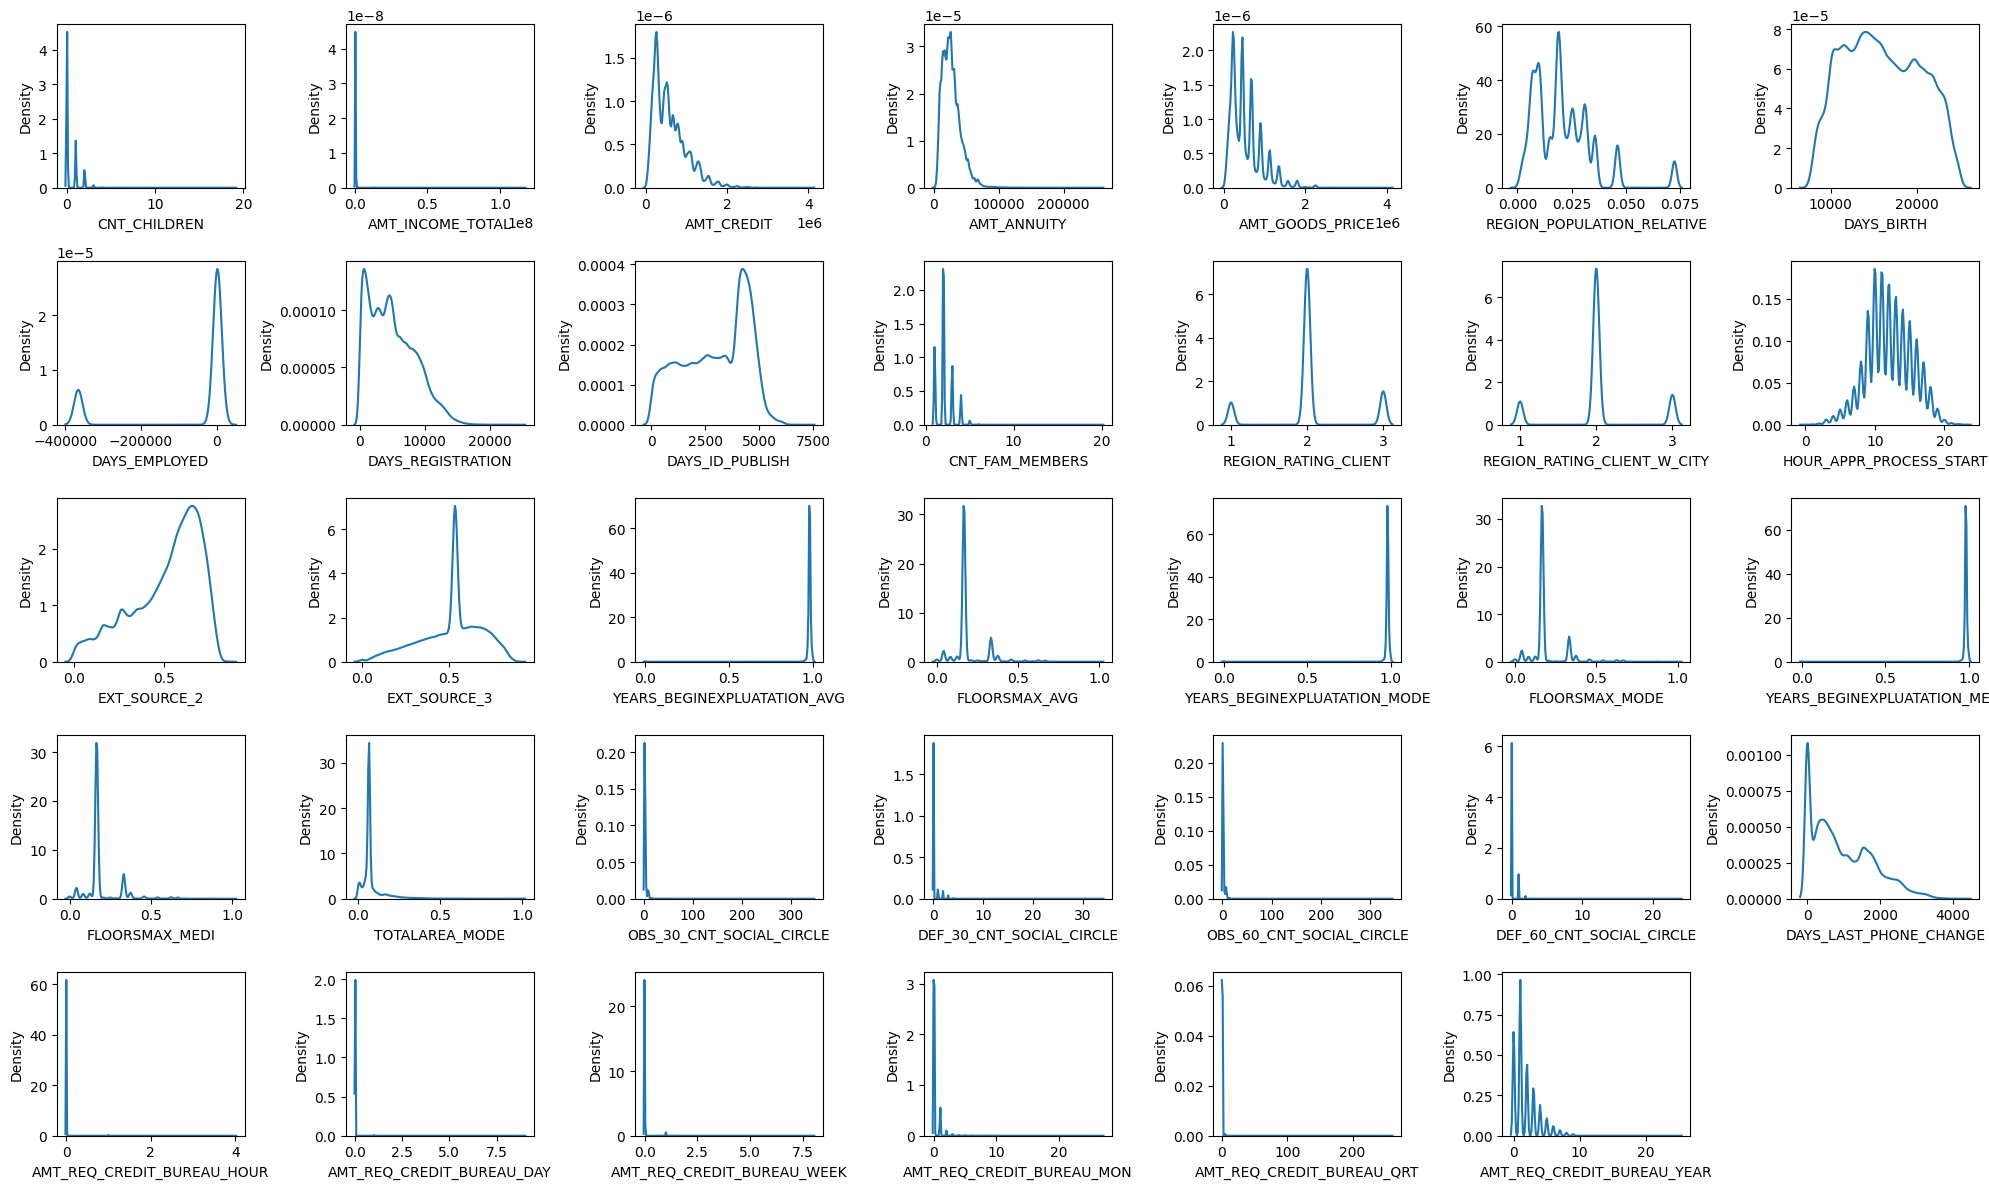

In [123]:
plt.figure(figsize=(20,12))

for i, column in enumerate (num[num_a].columns, 1):
    plt.subplot(5,7,i)
    sns.kdeplot(data=num[num_a], x=num[column])
    plt.tight_layout()

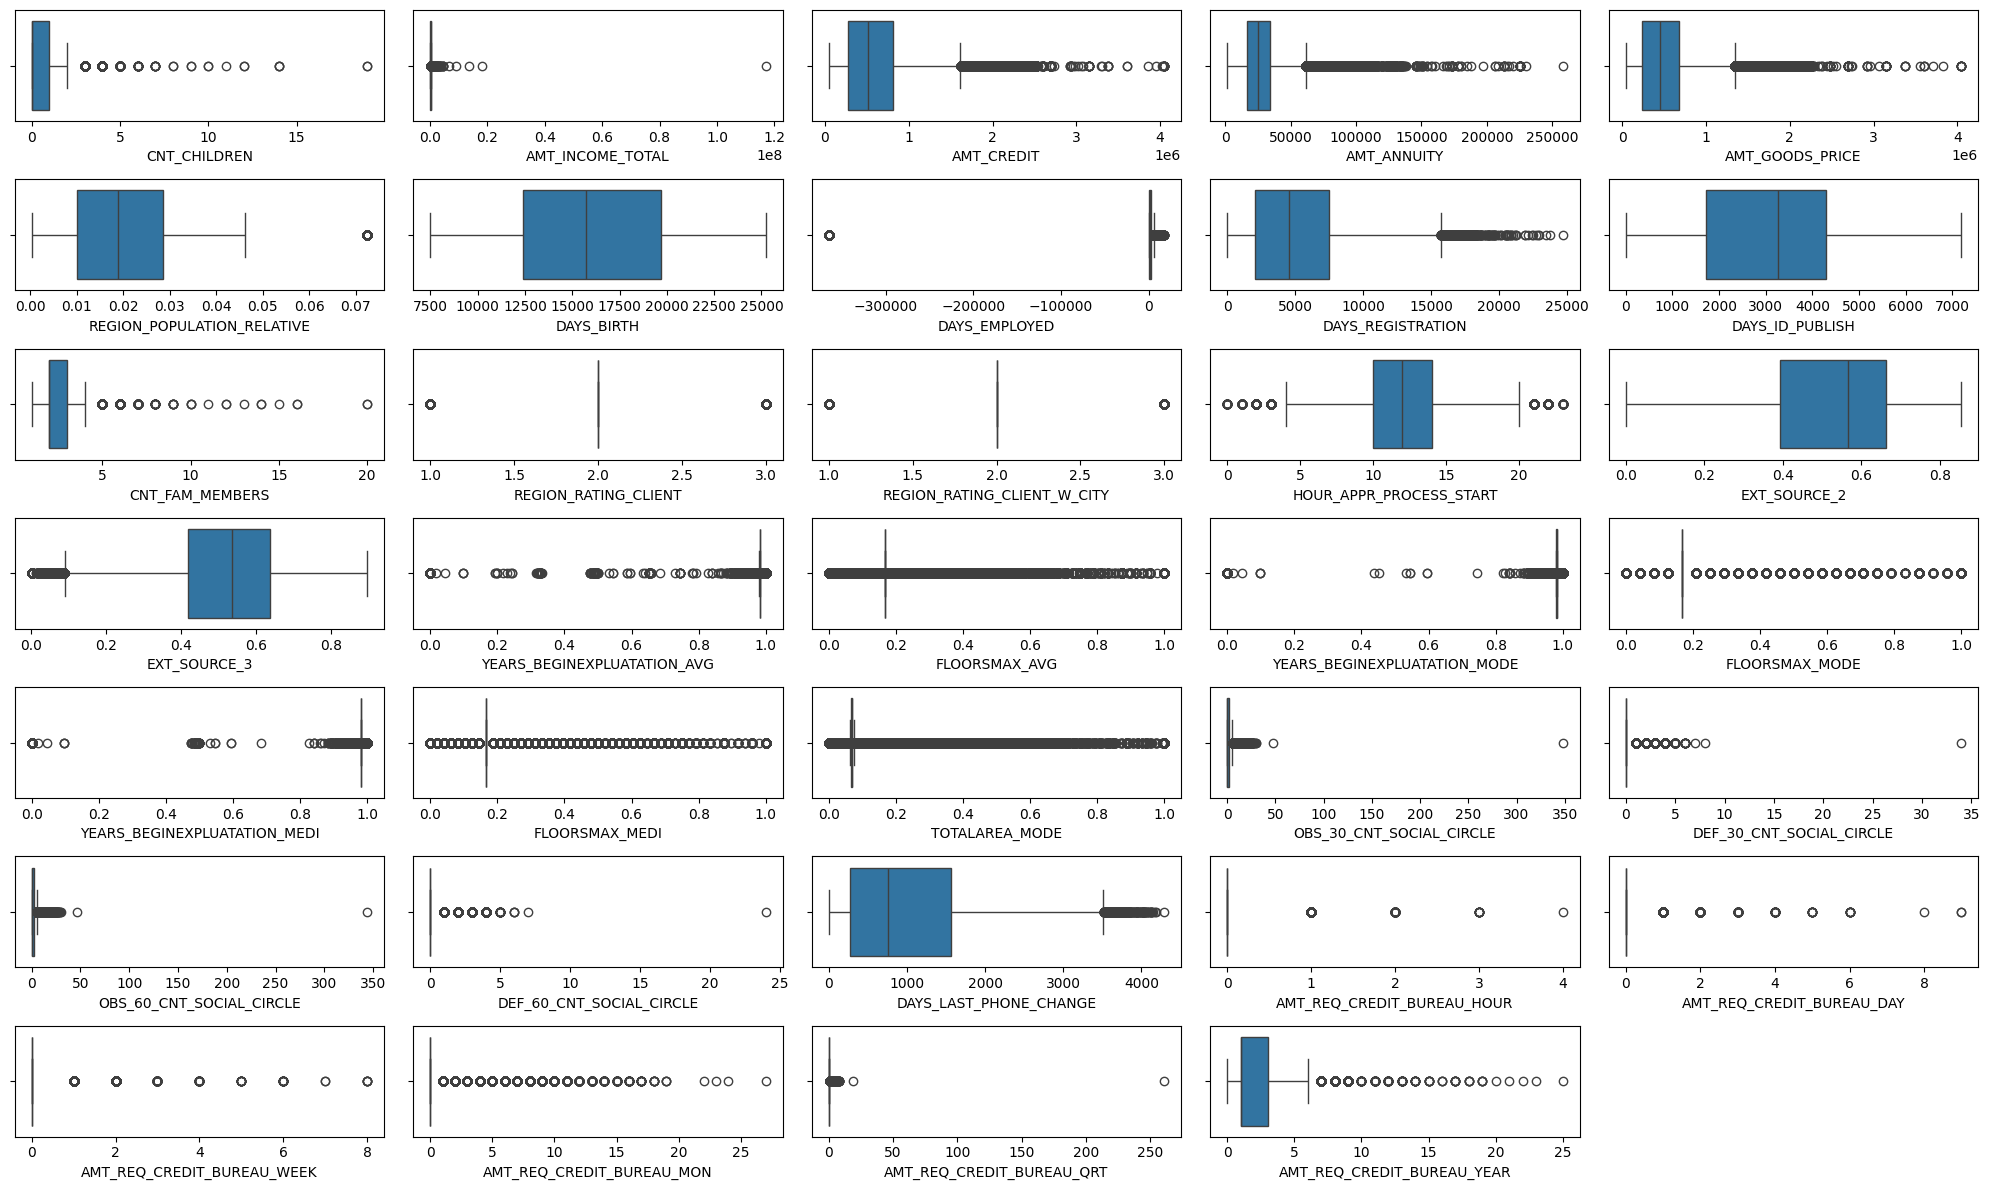

In [124]:
plt.figure(figsize=(20,12))

for i, column in enumerate (num[num_a].columns, 1):
    plt.subplot(7,5,i)
    sns.boxplot(data=num[num_a], x=num[column])
    plt.tight_layout()

In [125]:
num.describe()

CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  307511.000000      3.075110e+05  3.075110e+05  307511.000000   
mean        0.417052      1.687979e+05  5.990260e+05   27108.487841   
std         0.722121      2.371231e+05  4.024908e+05   14493.461065   
min         0.000000      2.565000e+04  4.500000e+04    1615.500000   
25%         0.000000      1.125000e+05  2.700000e+05   16524.000000   
50%         0.000000      1.471500e+05  5.135310e+05   24903.000000   
75%         1.000000      2.025000e+05  8.086500e+05   34596.000000   
max        19.000000      1.170000e+08  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count     3.075110e+05               307511.000000  307511.000000   
mean      5.383163e+05                    0.020868   16036.995067   
std       3.692890e+05                    0.013831    4363.988632   
min       4.050000e+04                    0.000290    7489.000000   
25%       2.385000e+05                    0.010006   12413.000000   
50%       4.500000e+05                    0.018850   15750.000000   
75%       6.795000e+05                    0.028663   19682.000000   
max       4.050000e+06                    0.072508   25229.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  ...  \
count  307511.000000      307511.000000    307511.000000  ...   
mean   -63815.045904        4986.120328      2994.202373  ...   
std    141275.766519        3522.886321      1509.450419  ...   
min   -365243.000000          -0.000000         0.000000  ...   
25%       289.000000        2010.000000      1720.000000  ...   
50%      1213.000000        4504.000000      3254.000000  ...   
75%      2760.000000        7479.500000      4299.000000  ...   
max     17912.000000       24672.000000      7197.000000  ...   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count             307511.000000             307511.000000   
mean                   0.142944                  1.400626   
std                    0.446033                  2.377224   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  2.000000   
max                   34.000000                344.000000   

       DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
count             307511.000000           307511.000000   
mean                   0.099717              962.858119   
std                    0.361735              826.807226   
min                    0.000000               -0.000000   
25%                    0.000000              274.000000   
50%                    0.000000              757.000000   
75%                    0.000000             1570.000000   
max                   24.000000             4292.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               307511.000000              307511.000000   
mean                     0.005538                   0.006055   
std                      0.078014                   0.103037   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               307511.000000              307511.000000   
mean                     0.029723                   0.231293   
std                      0.190728                   0.856810   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0

perlu penanganan:


*  cnt_children berisi jumlah anak, Nilai ekstrem seperti >5 anak jarang terjadi dan bisa memengaruhi model, bisa di-capping misalnya max 5.
*   DAYS_EMPLOYED berisi Lama bekerja (dalam hari, negatif = jumlah hari sebelum aplikasi) : Ada nilai ekstrem seperti 365243 (pengangguran permanen), bisa diubah dihapus data dengan nilai ekstrem
*   CNT_FAM_MEMBERS ditangani dengan capping max 7
*   AMT_ANNUITY, AMT_INCOME_TOTAL, OBS_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, AMT_REQ_CREDIT_BUREAU_QRT, dan REGION_POPULATION_RELATIVE ditangani dengan mengahapus nilai ekstrem yang terdapat pada data.

In [126]:
#CNT_CHILDREN
num = num[num['CNT_CHILDREN'] <= 5]

#CNT_FAM_MEMBERS
num = num[num['CNT_FAM_MEMBERS'] <= 7 ]

# DAYS_EMPLOYED
num = num[num['DAYS_EMPLOYED'] != -365243]

# AMT_ANNUITY
num = num[num['AMT_ANNUITY'] != 258025.5]

# AMT_INCOME_TOTAL
num = num[num['AMT_INCOME_TOTAL'] != 1.170000e+08]

# REGION_POPULATION_RELATIVE
max_val = num['REGION_POPULATION_RELATIVE'].max()
num = num[num['REGION_POPULATION_RELATIVE'] != max_val]

# OBS_30_CNT_SOCIAL_CIRCLE
max_val = num['OBS_30_CNT_SOCIAL_CIRCLE'].max()
num = num[num['OBS_30_CNT_SOCIAL_CIRCLE'] != max_val]

# OBS_60_CNT_SOCIAL_CIRCLE
max_val = num['OBS_60_CNT_SOCIAL_CIRCLE'].max()
num = num[num['OBS_60_CNT_SOCIAL_CIRCLE'] != max_val]

# DEF_30_CNT_SOCIAL_CIRCLE
max_val = num['DEF_30_CNT_SOCIAL_CIRCLE'].max()
num = num[num['DEF_30_CNT_SOCIAL_CIRCLE'] != max_val]

# DEF_60_CNT_SOCIAL_CIRCLE
max_val = num['DEF_60_CNT_SOCIAL_CIRCLE'].max()
num = num[num['DEF_60_CNT_SOCIAL_CIRCLE'] != max_val]

# AMT_REQ_CREDIT_BUREAU_QRT
max_val = num['AMT_REQ_CREDIT_BUREAU_QRT'].max()
num = num[num['AMT_REQ_CREDIT_BUREAU_QRT'] != max_val]

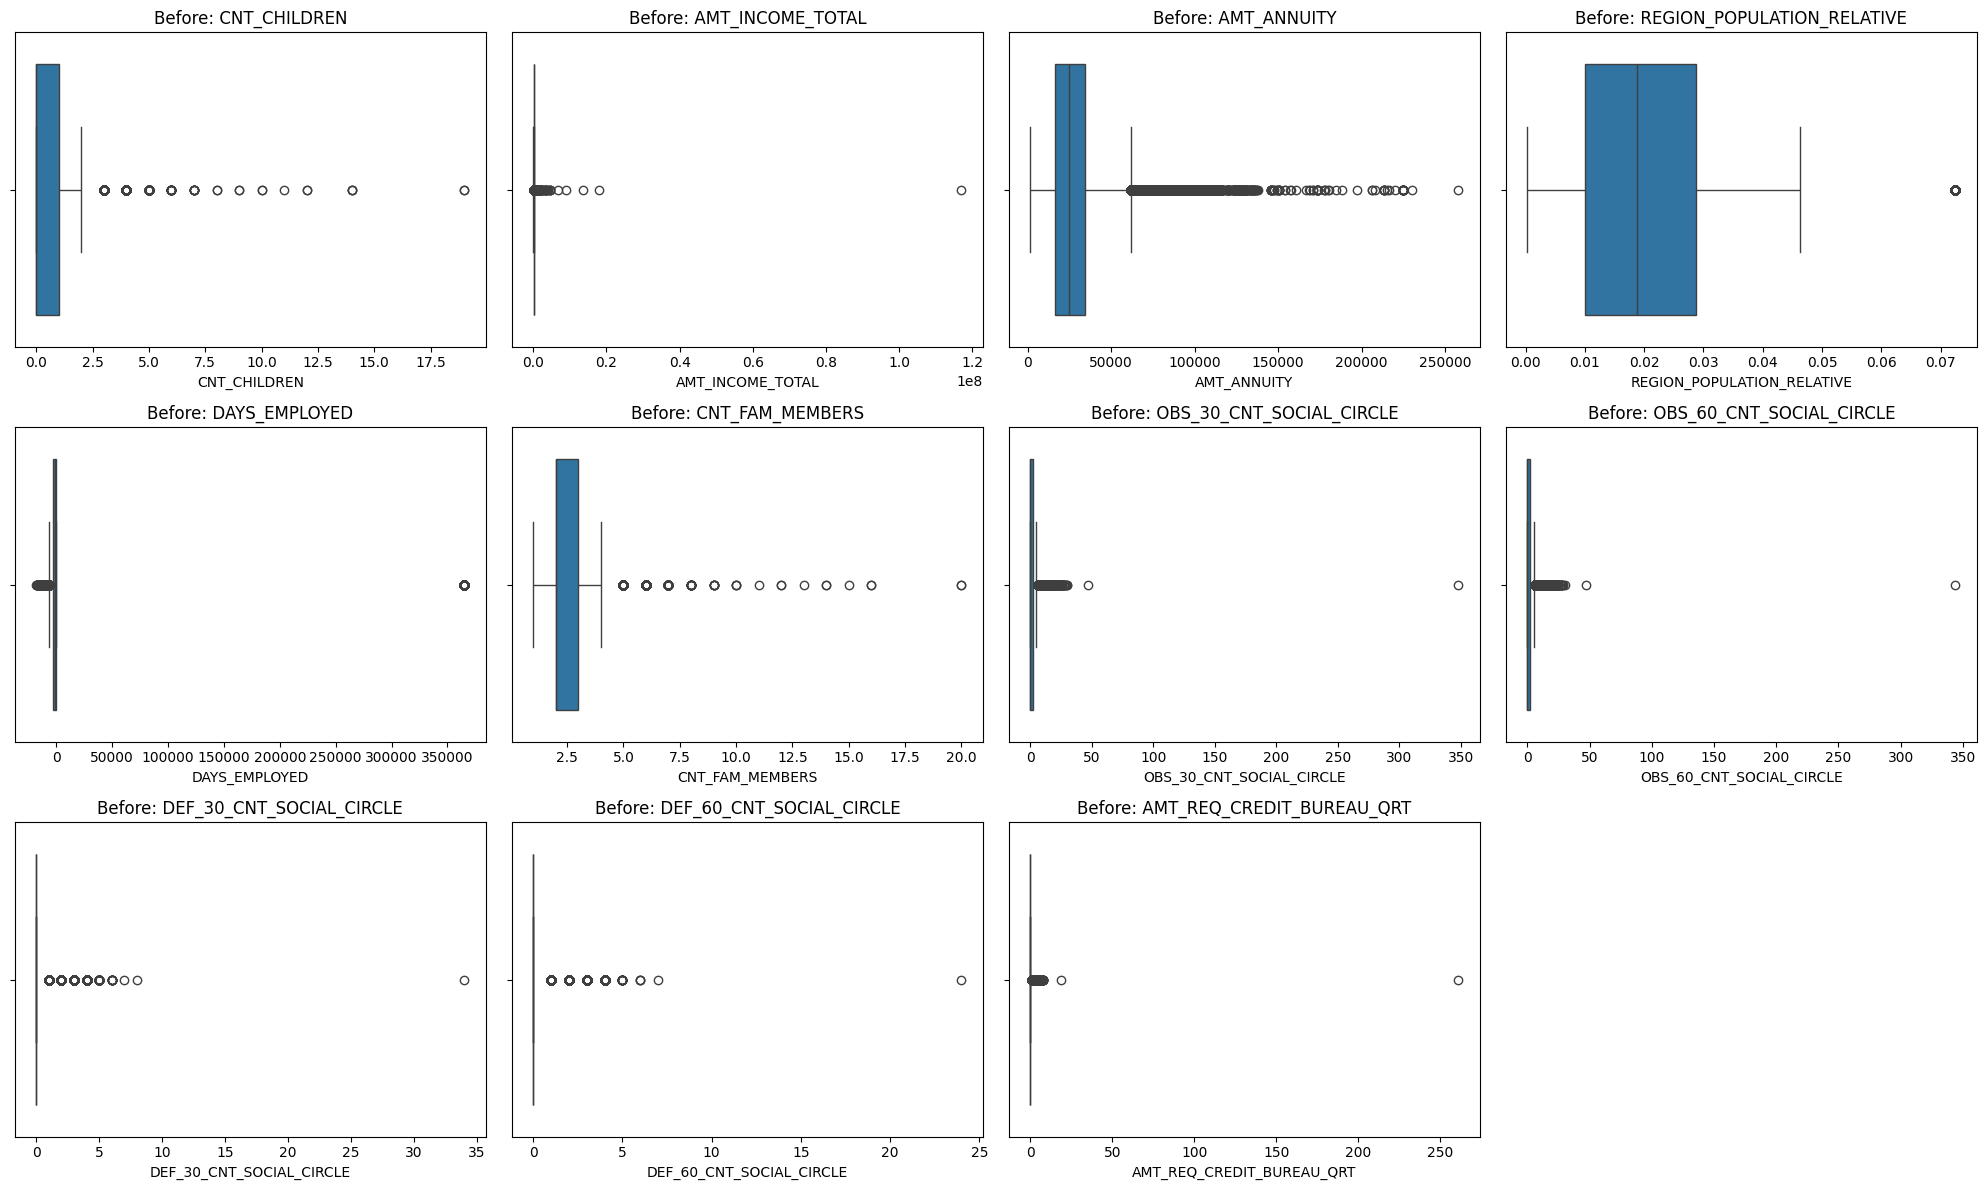

In [127]:
# List kolom dengan outlier
outlier_columns = [
    'CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_ANNUITY', 'REGION_POPULATION_RELATIVE',
    'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'OBS_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
    'AMT_REQ_CREDIT_BUREAU_QRT' ]


plt.figure(figsize=(20,12))

for i, column in enumerate (outlier_columns, 1):
    plt.subplot(3,4,i)
    sns.boxplot(data=df[outlier_columns], x=df[outlier_columns][column])
    plt.title(f'Before: {column}')

plt.tight_layout()

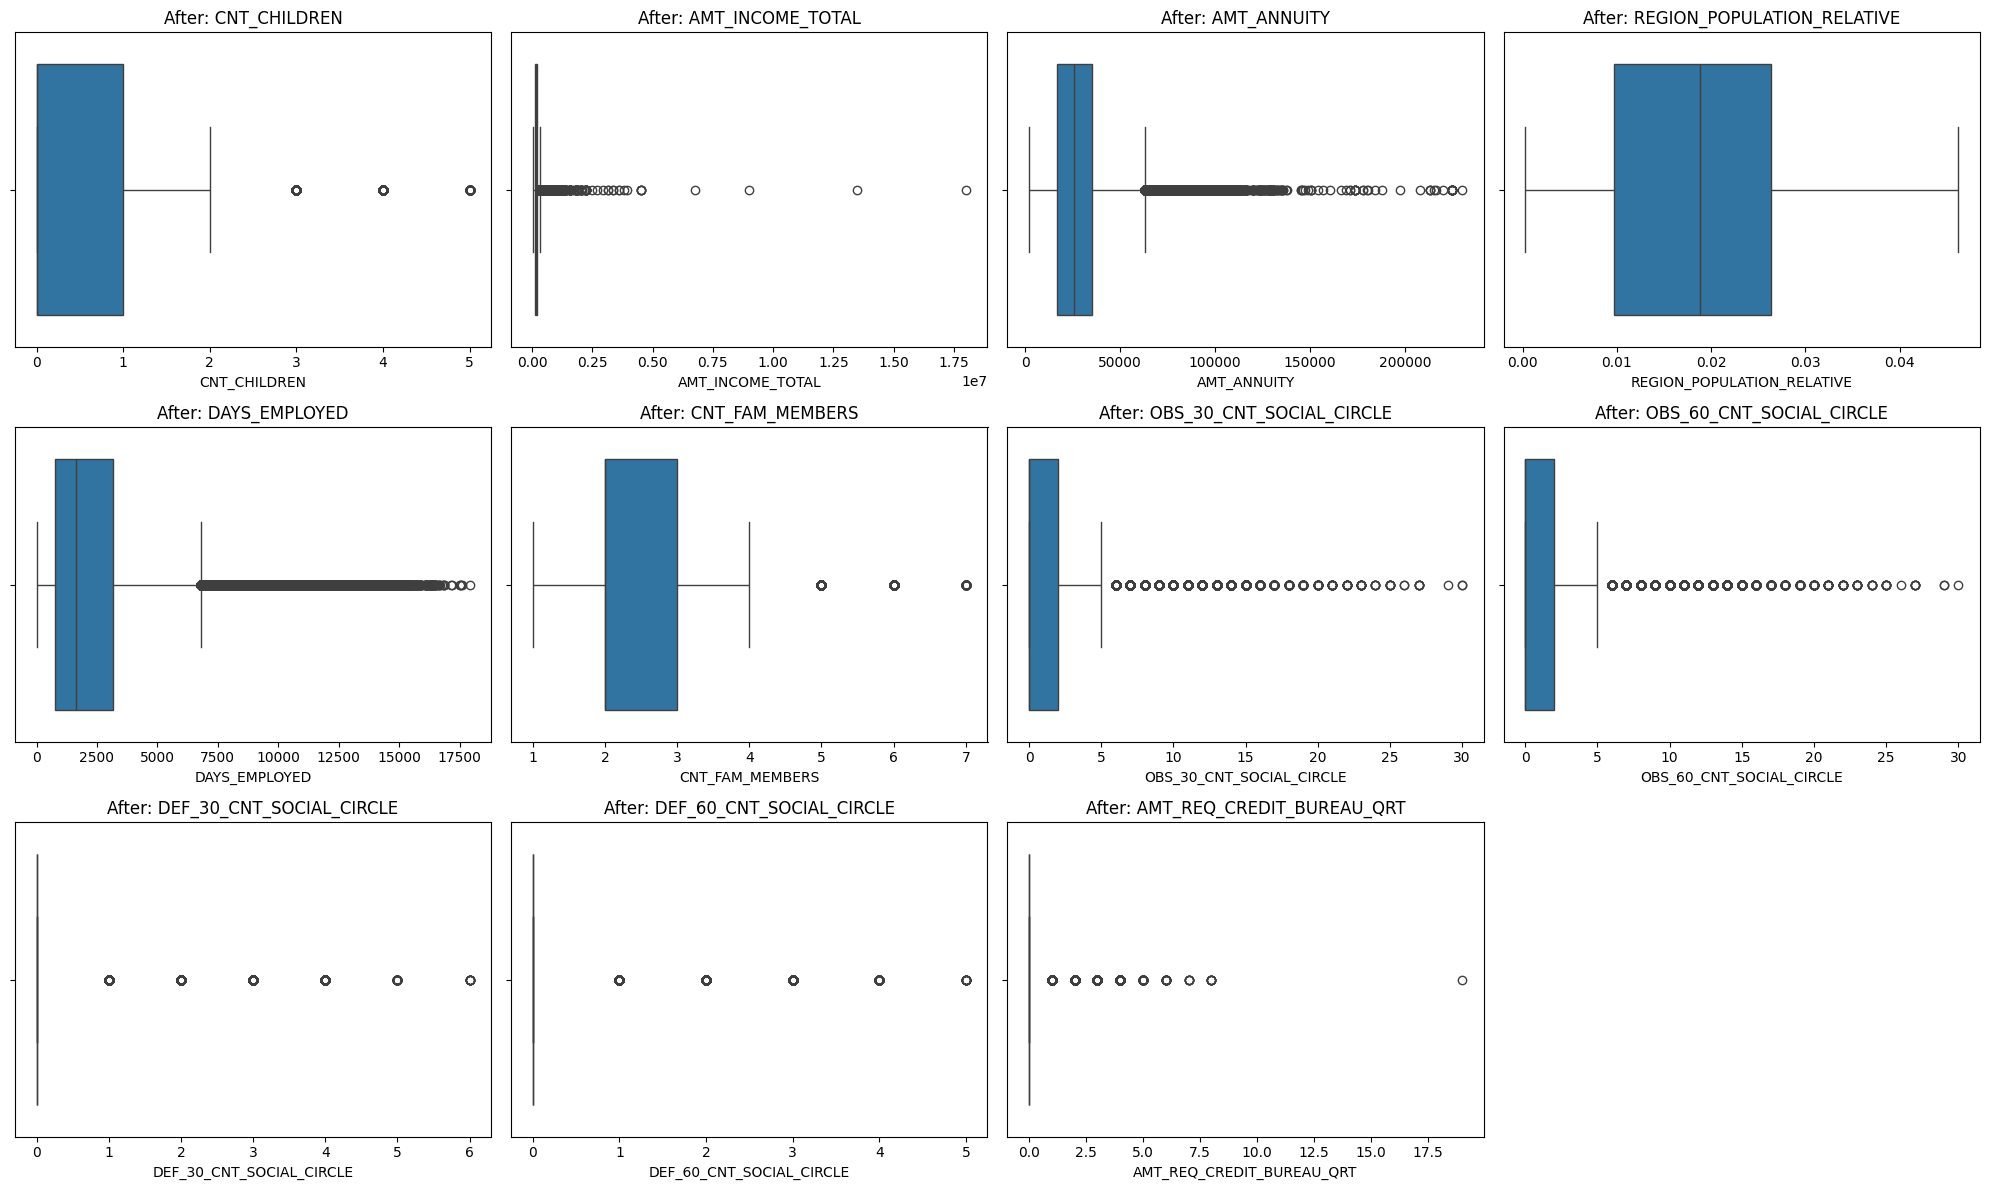

In [128]:
plt.figure(figsize=(20,12))
for i, column in enumerate (outlier_columns, 1):
    plt.subplot(3,4,i)
    sns.boxplot(data=num[outlier_columns], x=num[outlier_columns][column])
    plt.title(f'After: {column}')

plt.tight_layout()

In [129]:
df_clean = df.loc[num.index].copy()

In [130]:
df = df_clean.copy()

EDA

In [131]:
# create new column to replace values using text description
status= {0: 'No Risk', 1:'Risk'}
df['TARGET_DESC']= df['TARGET'].replace(status)

In [132]:
df['AGE'] = np.floor(df['DAYS_BIRTH']/-365).astype(int)
df.drop(columns= 'DAYS_BIRTH', inplace=True)
df.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1         Cash loans           M            N               Y   
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           F            N               Y   
4       0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   ... DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE  \
0  ...                      2.0                -1134.0   
1  ...                      0.0                 -828.0   
2  ...                      0.0                 -815.0   
3  ...                      0.0                 -617.0   
4  ...                      0.0                -1106.0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  TARGET_DESC  AGE  
0                        0.0                         1.0         Risk   25  
1                        0.0                         0.0      No Risk   45  
2                        0.0                         0.0      No Risk   52  
3                        0.0                         1.0      No Risk   52  
4                        0.0                         0.0      No Risk   54  

[5 rows x 59 columns]

In [133]:
age_category = []
for i in df['AGE']:
  if i <=35:
    age_category.append('Young Adult')
  elif i <=50:
    age_category.append('Adult')
  else:
    age_category.append('Older')
df['AGE_CATEGORY'] = age_category
df.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1         Cash loans           M            N               Y   
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           F            N               Y   
4       0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   ... DAYS_LAST_PHONE_CHANGE AMT_REQ_CREDIT_BUREAU_HOUR  \
0  ...                -1134.0                        0.0   
1  ...                 -828.0                        0.0   
2  ...                 -815.0                        0.0   
3  ...                 -617.0                        0.0   
4  ...                -1106.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  TARGET_DESC  AGE  AGE_CATEGORY  
0                         1.0         Risk   25   Young Adult  
1                         0.0      No Risk   45         Adult  
2                         0.0      No Risk   52         Older  
3                         1.0      No Risk   52         Older  
4                         0.0      No Risk   54         Older  

[5 rows x 60 columns]

In [134]:
df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 159827
Single / not married     37998
Civil marriage           25556
Separated                15433
Widow                     6538
Name: count, dtype: int64

In [135]:
Marital_status = []
married = ['Married','Civil marriage']
for i in df['NAME_FAMILY_STATUS']:
  if i in married:
    Marital_status.append('Married')
  else:
    Marital_status.append('Unmarried')
df['Marital_status'] = Marital_status
df.drop(columns='NAME_FAMILY_STATUS',inplace=True)
df.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1         Cash loans           M            N               Y   
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           F            N               Y   
4       0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   ... AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0  ...                        0.0                       0.0   
1  ...                        0.0                       0.0   
2  ...                        0.0                       0.0   
3  ...                        0.0                       0.0   
4  ...                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  TARGET_DESC  AGE  \
0                        0.0                         1.0         Risk   25   
1                        0.0                         0.0      No Risk   45   
2                        0.0                         0.0      No Risk   52   
3                        0.0                         1.0      No Risk   52   
4                        0.0                         0.0      No Risk   54   

   AGE_CATEGORY  Marital_status  
0   Young Adult       Unmarried  
1         Adult         Married  
2         Older       Unmarried  
3         Older         Married  
4         Older       Unmarried  

[5 rows x 60 columns]

<ipython-input-136-db3d31c1ab80>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = value / total[group_index]
<ipython-input-136-db3d31c1ab80>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = value / total[group_index]
<ipython-input-136-db3d31c1ab80>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = value / total[group_index]
<ipython-input-136-db3d31c1ab80>:9: FutureWarning: Series.__getitem__ 

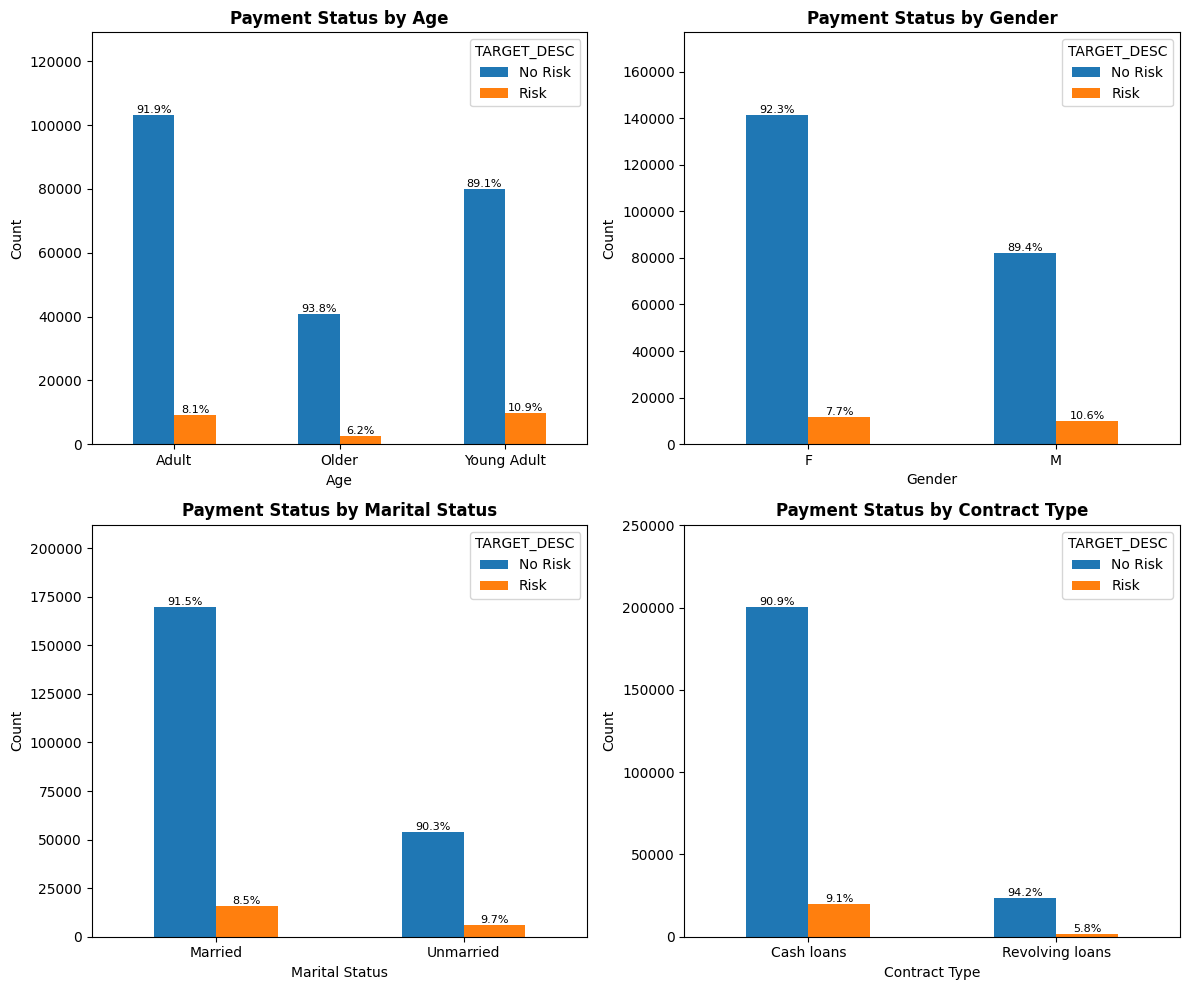

In [136]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

def annotate_bars(ax, data):
    total = data.sum(axis=1)
    max_height = 0
    for i, p in enumerate(ax.patches):
        group_index = i % len(total)
        value = p.get_height()
        percentage = value / total[group_index]
        ax.annotate(f'{percentage:.1%}',
                    (p.get_x() + p.get_width() / 2., value + 2),
                    ha='center', va='bottom', fontsize=8, color='black')
        if value > max_height:
            max_height = value
    ax.set_ylim(0, max_height * 1.25)  # naikkan batas atas sumbu Y

# 1. Age
target_age = df.groupby(['AGE_CATEGORY', 'TARGET_DESC']).size().unstack()
axis1 = target_age.plot(kind='bar', ax=axes[0, 0])
axis1.set_xticklabels(axis1.get_xticklabels(), rotation=0)
axis1.set_xlabel('Age')
axis1.set_ylabel('Count')
axis1.set_title('Payment Status by Age', weight='bold')
annotate_bars(axis1, target_age)

# 2. Gender
target_gender = df.groupby(['CODE_GENDER', 'TARGET_DESC']).size().unstack()
axis2 = target_gender.plot(kind='bar', ax=axes[0, 1])
axis2.set_xticklabels(axis2.get_xticklabels(), rotation=0)
axis2.set_xlabel('Gender')
axis2.set_ylabel('Count')
axis2.set_title('Payment Status by Gender', weight= 'bold')
annotate_bars(axis2, target_gender)

# 3. Marital Status
target_marital = df.groupby(['Marital_status', 'TARGET_DESC']).size().unstack()
axis3 = target_marital.plot(kind='bar', ax=axes[1, 0])
axis3.set_xticklabels(axis3.get_xticklabels(), rotation=0)
axis3.set_xlabel('Marital Status')
axis3.set_ylabel('Count')
axis3.set_title('Payment Status by Marital Status', weight='bold')
annotate_bars(axis3, target_marital)

# 4. Contract Type
target_contract = df.groupby(['NAME_CONTRACT_TYPE', 'TARGET_DESC']).size().unstack()
axis4 = target_contract.plot(kind='bar', ax=axes[1, 1])
axis4.set_xticklabels(axis4.get_xticklabels(), rotation=0)
axis4.set_xlabel('Contract Type')
axis4.set_ylabel('Count')
axis4.set_title('Payment Status by Contract Type', weight='bold')
annotate_bars(axis4, target_contract)

plt.tight_layout()
plt.show()


<ipython-input-137-140a0de537cf>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = value / total[group_index]
<ipython-input-137-140a0de537cf>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = value / total[group_index]


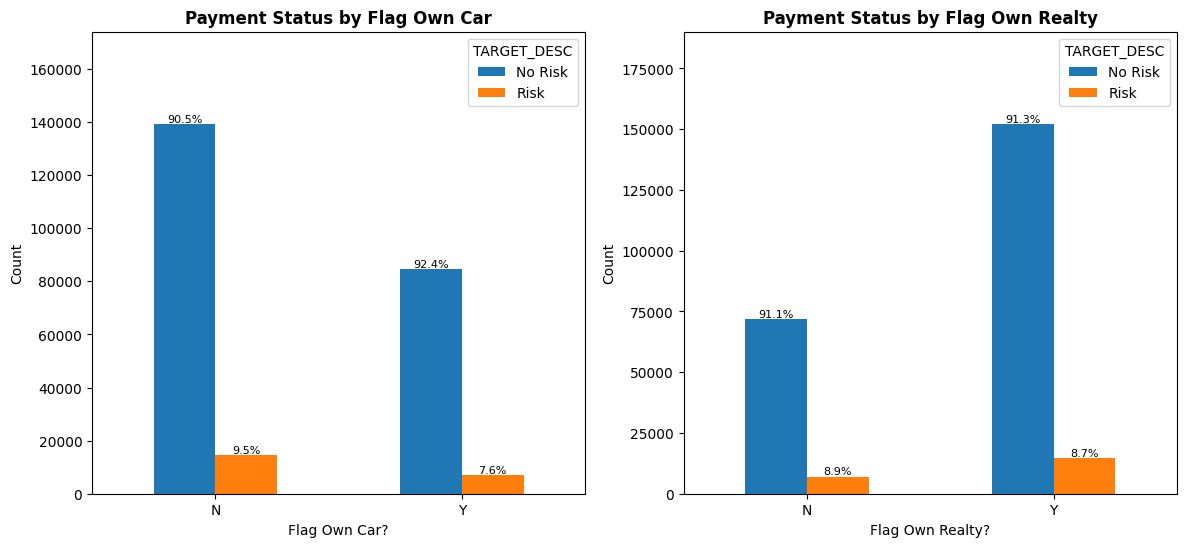

In [137]:
 fig, axes = plt.subplots(1,2 , figsize=(14, 6))

def annotate_bars(ax, data):
    total = data.sum(axis=1)
    max_height = 0
    for i, p in enumerate(ax.patches):
        group_index = i % len(total)
        value = p.get_height()
        percentage = value / total[group_index]
        ax.annotate(f'{percentage:.1%}',
                    (p.get_x() + p.get_width() / 2., value + 2),
                    ha='center', va='bottom', fontsize=8, color='black')
        if value > max_height:
            max_height = value
    ax.set_ylim(0, max_height * 1.25)  # naikkan batas atas sumbu Y

# 1. Flag Own Car
target_flag_car = df.groupby(['FLAG_OWN_CAR', 'TARGET_DESC']).size().unstack()
axis1 = target_flag_car.plot(kind='bar', ax=axes[0])
axis1.set_xticklabels(axis1.get_xticklabels(), rotation=0)
axis1.set_xlabel('Flag Own Car?')
axis1.set_ylabel('Count')
axis1.set_title('Payment Status by Flag Own Car', weight='bold')
annotate_bars(axis1, target_flag_car)

# 2. Flag Own Realty
target_flag_realty = df.groupby(['FLAG_OWN_REALTY', 'TARGET_DESC']).size().unstack()
axis2 = target_flag_realty.plot(kind='bar', ax=axes[ 1])
axis2.set_xticklabels(axis2.get_xticklabels(), rotation=0)
axis2.set_xlabel('Flag Own Realty?')
axis2.set_ylabel('Count')
axis2.set_title('Payment Status by Flag Own Realty', weight='bold')
annotate_bars(axis2, target_flag_realty)

<ipython-input-138-580a1b1e80a5>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = value / total[group_index]
<ipython-input-138-580a1b1e80a5>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = value / total[group_index]


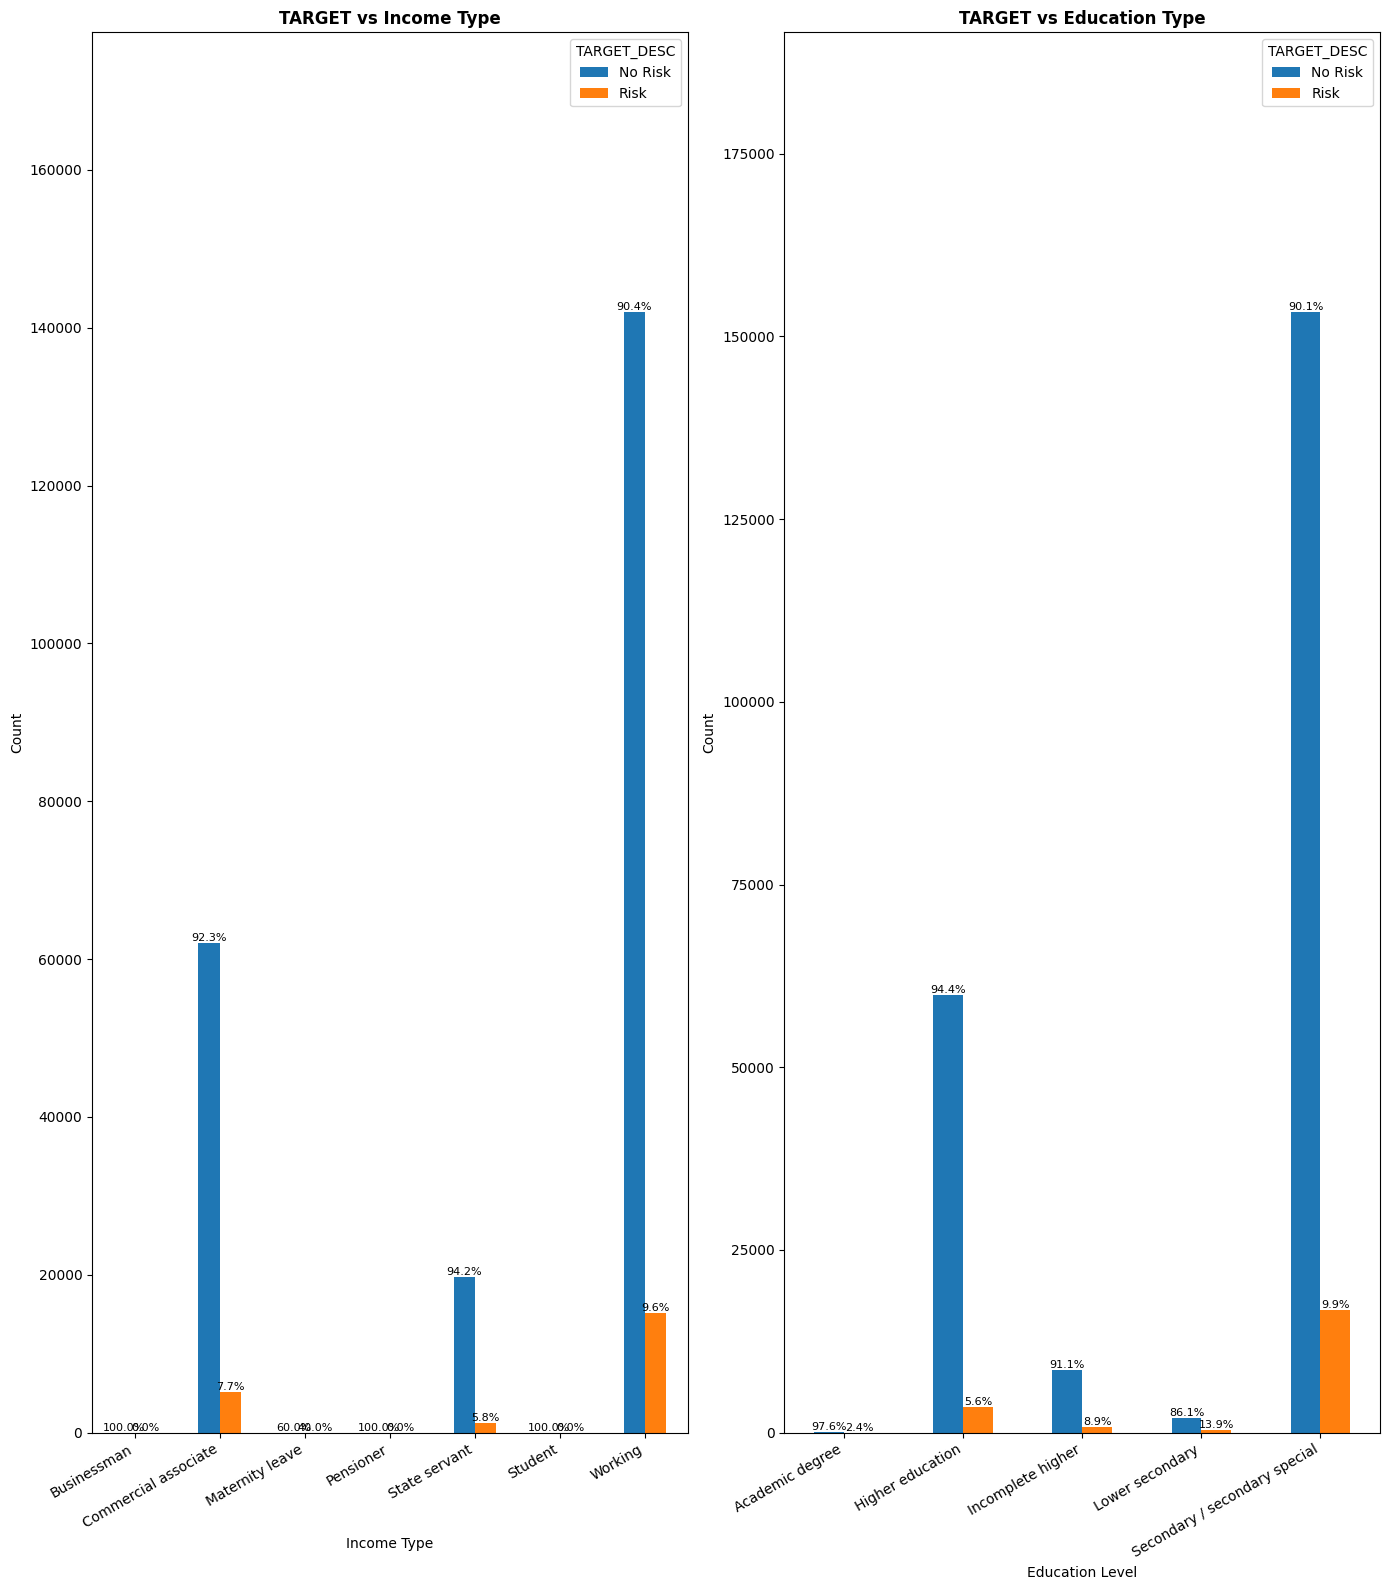

In [138]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 16))

def annotate_bars(ax, data):
    total = data.sum(axis=1)
    max_height = 0
    for i, p in enumerate(ax.patches):
        group_index = i % len(total)
        value = p.get_height()
        percentage = value / total[group_index]
        ax.annotate(f'{percentage:.1%}',
                    (p.get_x() + p.get_width() / 2., value + 2),
                    ha='center', va='bottom', fontsize=8, color='black')
        if value > max_height:
            max_height = value
    ax.set_ylim(0, max_height * 1.25)

# 1. NAME_INCOME_TYPE
income = df.groupby(['NAME_INCOME_TYPE', 'TARGET_DESC']).size().unstack()
ax1 = income.plot(kind='bar', ax=axes[0])
ax1.set_title('TARGET vs Income Type', weight='bold')
ax1.set_xlabel('Income Type')
ax1.set_ylabel('Count')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')
annotate_bars(ax1, income)

# 2. NAME_EDUCATION_TYPE
edu = df.groupby(['NAME_EDUCATION_TYPE', 'TARGET_DESC']).size().unstack()
ax2 = edu.plot(kind='bar', ax=axes[1])
ax2.set_title('TARGET vs Education Type', weight='bold')
ax2.set_xlabel('Education Level')
ax2.set_ylabel('Count')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha='right')
annotate_bars(ax2, edu)

plt.tight_layout()
plt.show()

In [139]:
# Tabel jumlah berdasarkan NAME_INCOME_TYPE dan TARGET_DESC
target_income = df.groupby(['NAME_INCOME_TYPE', 'TARGET_DESC']).size().unstack().fillna(0)
target_income_percent = target_income.div(target_income.sum(axis=1), axis=0)*100
combined_income = target_income.astype(int).astype(str) + '('+target_income_percent.round(1).astype(str) + '%)'
target_income = pd.DataFrame(combined_income)
print("\nJumlah berdasarkan NAME_INCOME_TYPE dan TARGET_DESC:")
print(combined_income)


Jumlah berdasarkan NAME_INCOME_TYPE dan TARGET_DESC:
TARGET_DESC                 No Risk         Risk
NAME_INCOME_TYPE                                
Businessman               7(100.0%)      0(0.0%)
Commercial associate   62101(92.3%)   5199(7.7%)
Maternity leave            3(60.0%)     2(40.0%)
Pensioner                10(100.0%)      0(0.0%)
State servant          19718(94.2%)   1208(5.8%)
Student                  17(100.0%)      0(0.0%)
Working               141944(90.4%)  15143(9.6%)


In [140]:
#Tabel jumlah berdasarkan NAME_EDUCATION_TYPE dan TARGET_DESC
target_education = df.groupby(['NAME_EDUCATION_TYPE','TARGET_DESC']).size().unstack().fillna(0)
target_education_percent = target_education.div(target_education.sum(axis=1), axis=0)*100
combined_education = target_education.astype(int).astype(str) + '('+target_education_percent.round(1).astype(str) + '%)'
target_education = pd.DataFrame(combined_education)
print("\nJumlah berdasarkan NAME_EDUCATION_TYPE dan TARGET_DESC:")
print(combined_education)


Jumlah berdasarkan NAME_EDUCATION_TYPE dan TARGET_DESC:
TARGET_DESC                          No Risk         Risk
NAME_EDUCATION_TYPE                                      
Academic degree                   123(97.6%)      3(2.4%)
Higher education                59938(94.4%)   3569(5.6%)
Incomplete higher                8506(91.1%)    829(8.9%)
Lower secondary                  1949(86.1%)   314(13.9%)
Secondary / secondary special  153284(90.1%)  16837(9.9%)


In [141]:
# calc of the day (make abs)
df['DAYS_EMPLOYED']= df['DAYS_EMPLOYED'].abs()
df['DAYS_REGISTRATION']= df['DAYS_REGISTRATION'].abs()
df['DAYS_ID_PUBLISH']= df['DAYS_ID_PUBLISH'].abs()
df['DAYS_LAST_PHONE_CHANGE']= df['DAYS_LAST_PHONE_CHANGE'].abs()

In [142]:
cat =  df.select_dtypes(include='object').columns.tolist()
cat

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'EMERGENCYSTATE_MODE',
 'TARGET_DESC',
 'AGE_CATEGORY',
 'Marital_status']

In [143]:
df_copy = df.copy()
df_copy[cat] = df_copy[cat].apply(LabelEncoder().fit_transform)
df_copy.head()

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1                   0            1             0                1   
1       0                   0            0             0                0   
2       0                   1            1             1                1   
3       0                   0            0             0                1   
4       0                   0            1             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   ...  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0  ...                         0.0                        0.0   
1  ...                         0.0                        0.0   
2  ...                         0.0                        0.0   
3  ...                         0.0                        0.0   
4  ...                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  TARGET_DESC  AGE  \
0                        0.0                         1.0            1   25   
1                        0.0                         0.0            0   45   
2                        0.0                         0.0            0   52   
3                        0.0                         1.0            0   52   
4                        0.0                         0.0            0   54   

   AGE_CATEGORY  Marital_status  
0             2               1  
1             0               0  
2             1               1  
3             1               0  
4             1               1  

[5 rows x 60 columns]

In [144]:
df_copy = df_copy.drop(columns = ['AGE_CATEGORY','TARGET_DESC', 'Marital_status'])
df_copy = df_copy.dropna()

In [145]:
df_copy.head()

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1                   0            1             0                1   
1       0                   0            0             0                0   
2       0                   1            1             1                1   
3       0                   0            0             0                1   
4       0                   0            1             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   ...  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0  ...                       2.0                       2.0   
1  ...                       1.0                       0.0   
2  ...                       0.0                       0.0   
3  ...                       2.0                       0.0   
4  ...                       0.0                       0.0   

   DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                  1134.0                         0.0   
1                   828.0                         0.0   
2                   815.0                         0.0   
3                   617.0                         0.0   
4                  1106.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  AGE  
0                         1.0   25  
1                         0.0   45  
2                         0.0   52  
3                         1.0   52  
4                         0.0   54  

[5 rows x 57 columns]

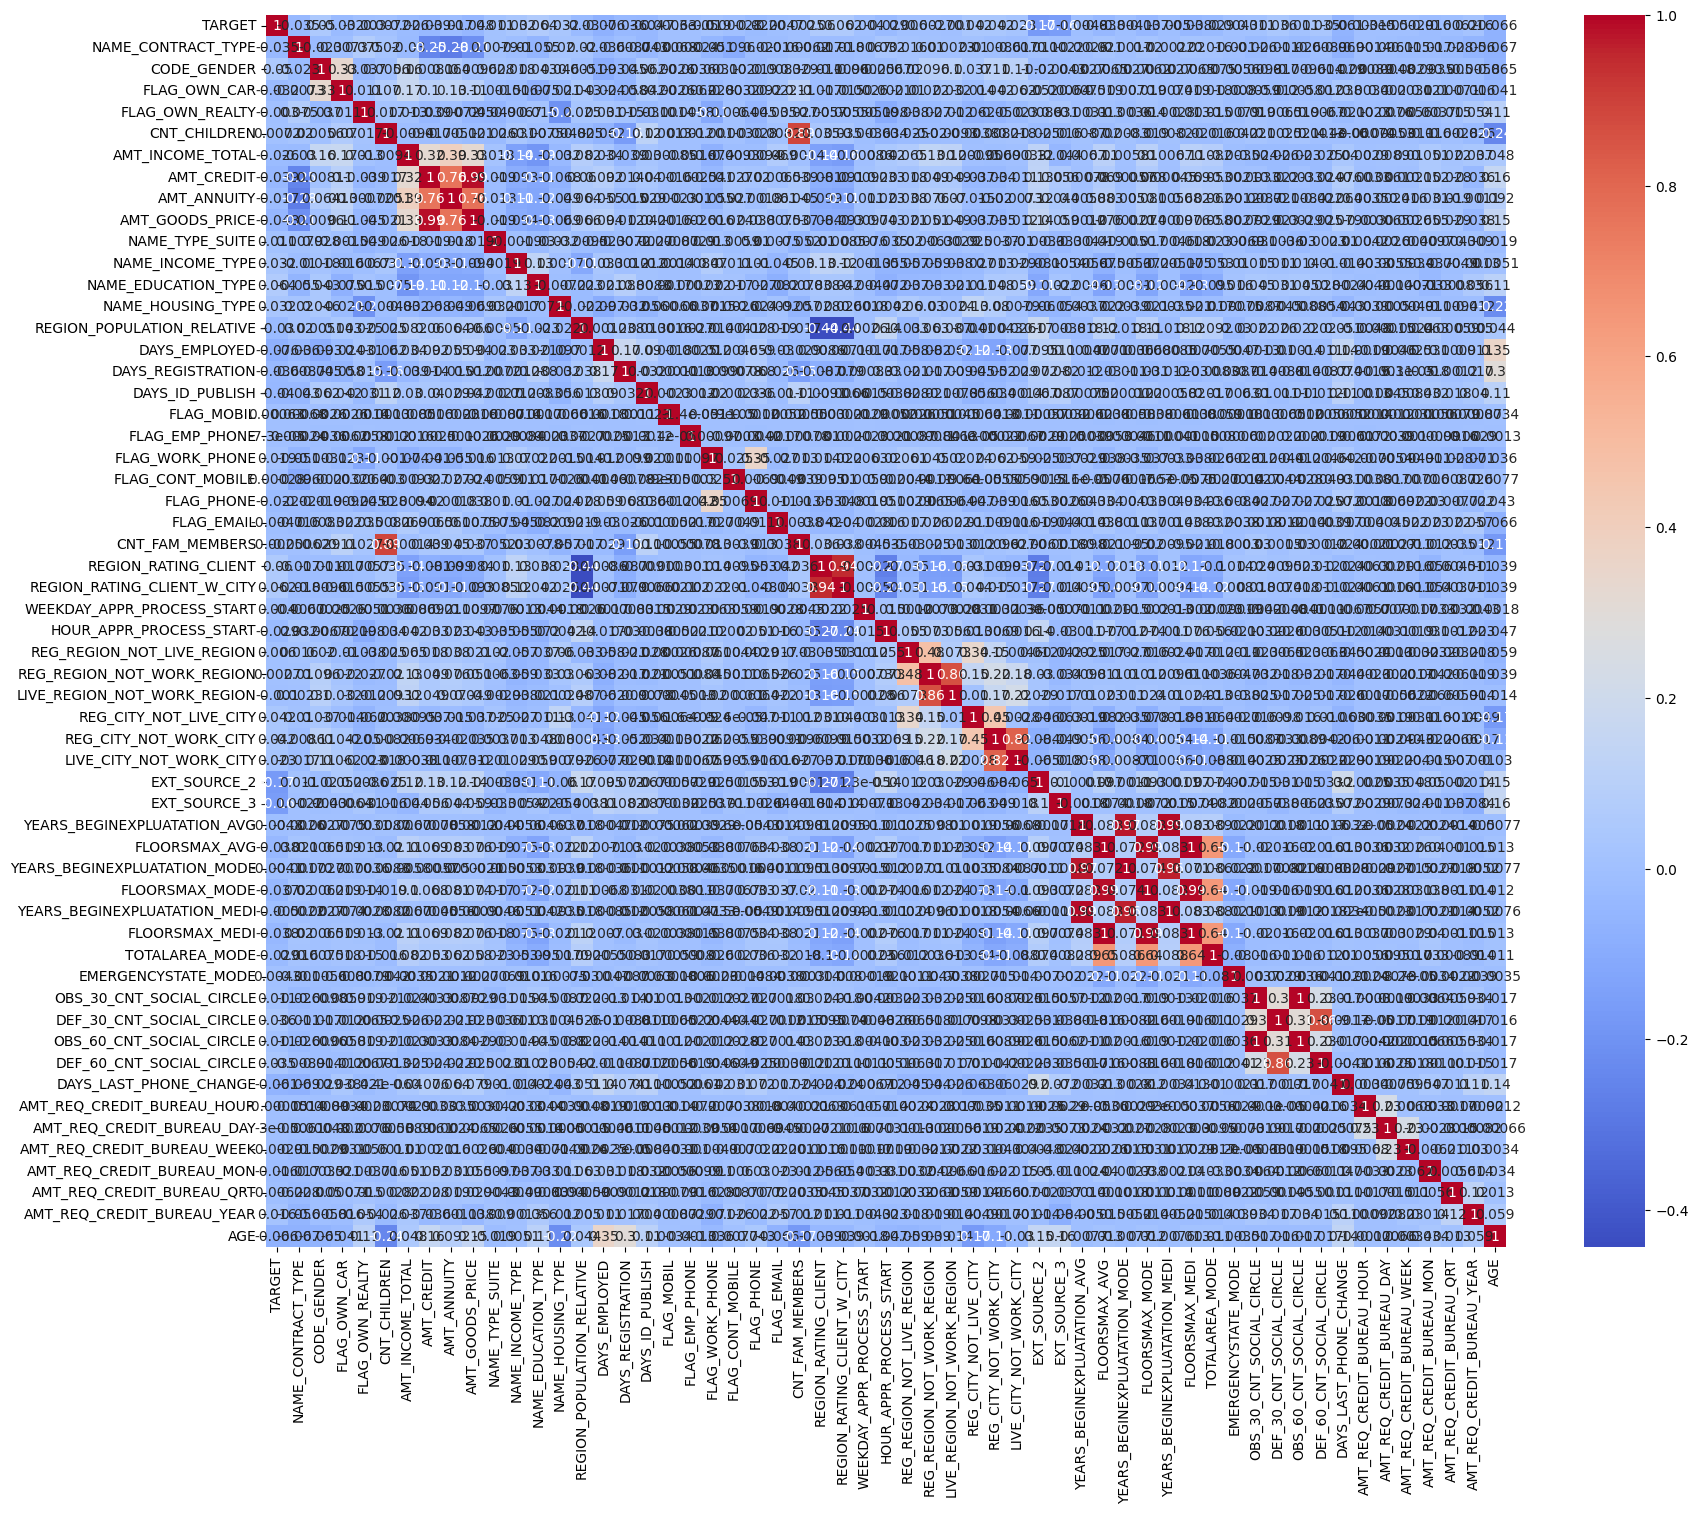

In [146]:
plt.figure(figsize = (20,16))
sns.heatmap(df_copy.corr(), annot = True, cmap = 'coolwarm')
plt.show()

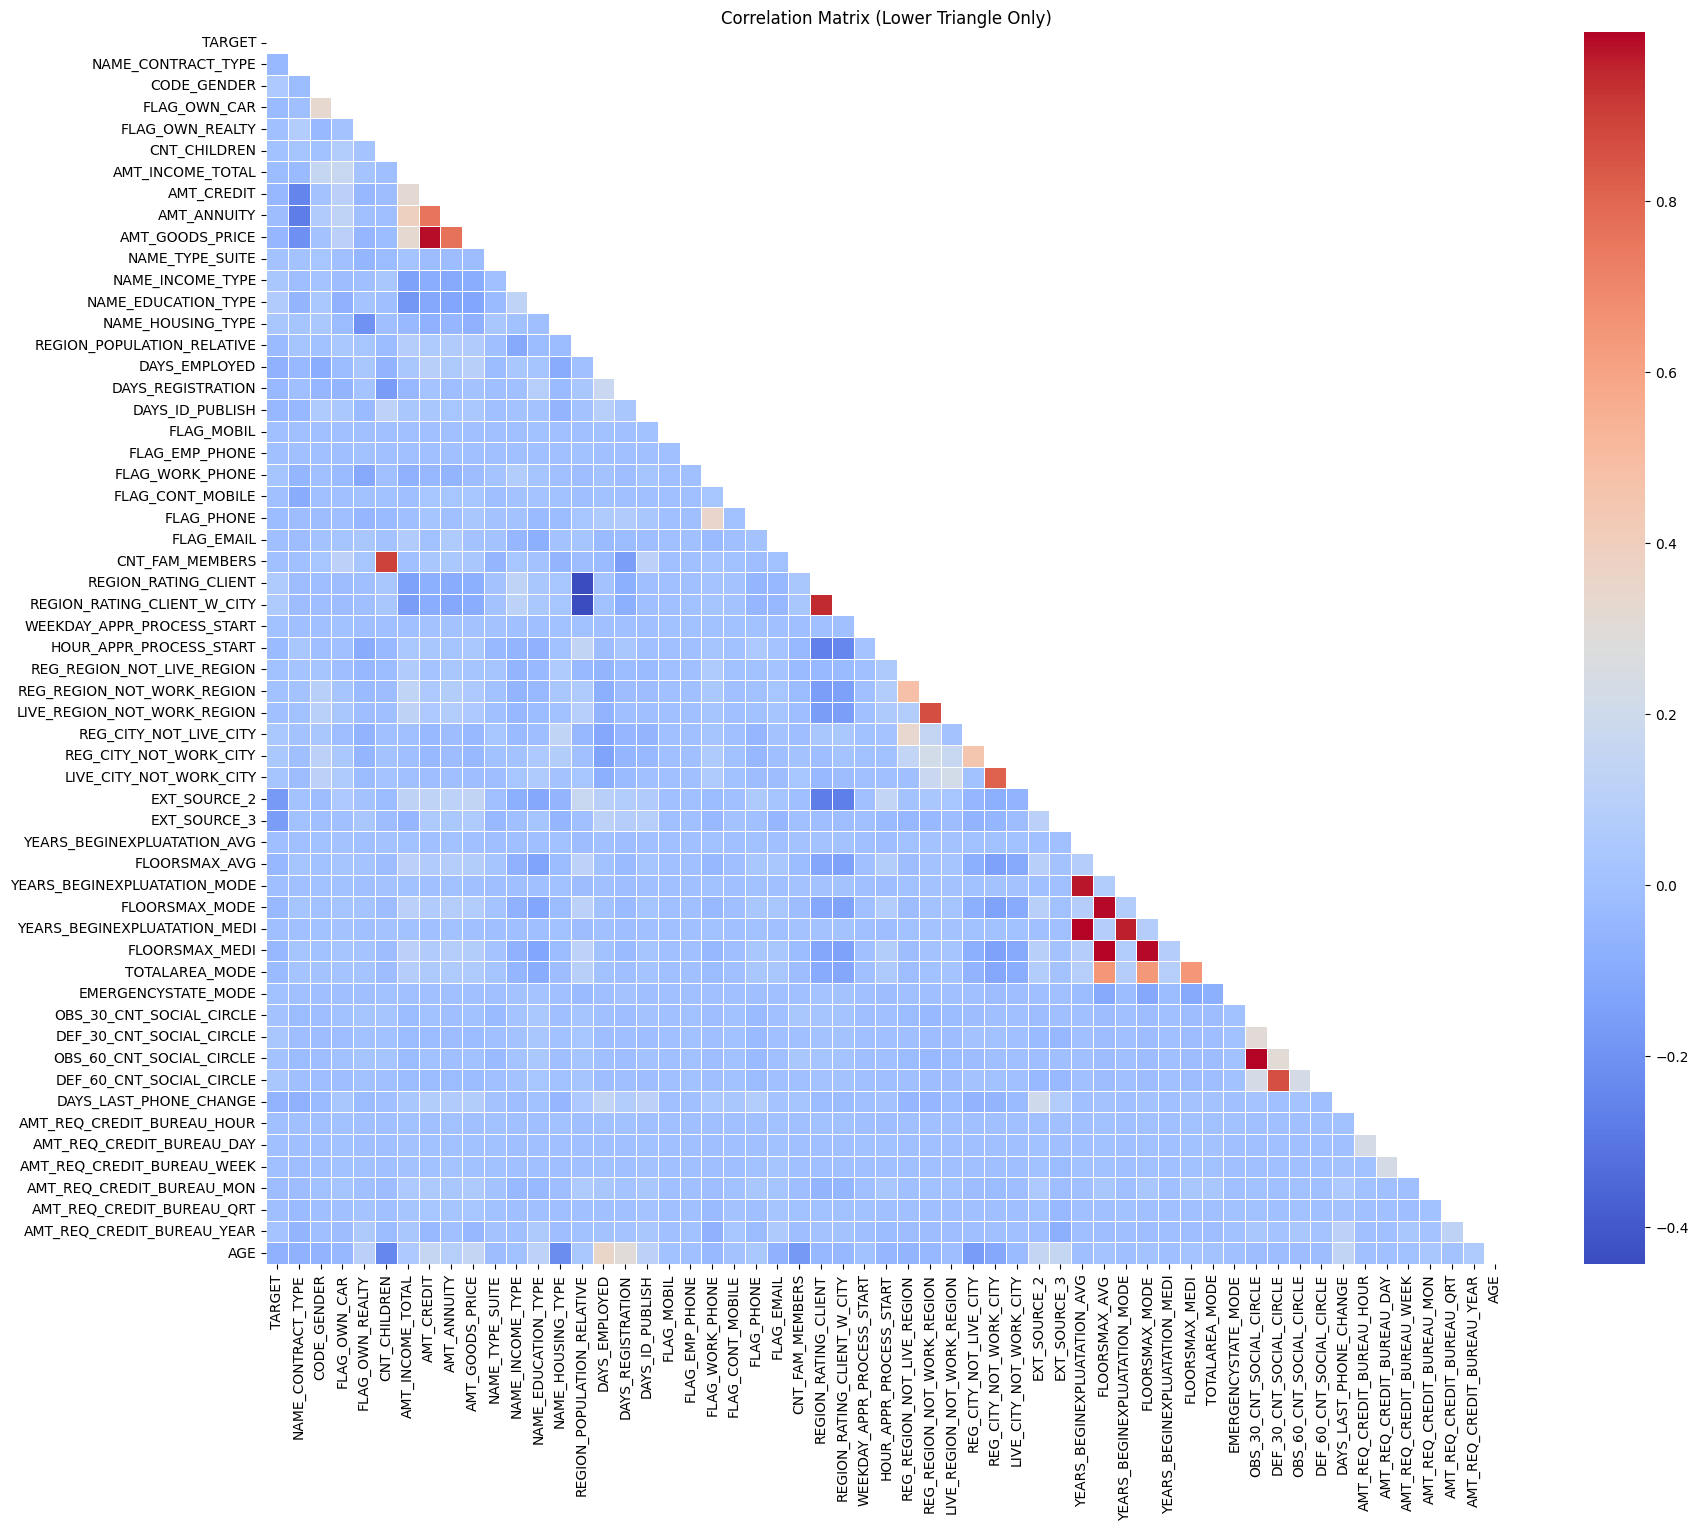

In [147]:
# Correlation matrix
corr = df_copy.corr()

# Buat mask untuk segitiga atas
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Lower Triangle Only)")
plt.show()

In [148]:
# Threshold
threshold = 0.8

# Correlation matrix
corr_matrix = df_copy.corr().abs()

# Ambil pasangan kolom di atas threshold (tanpa duplikat)
high_corr_var = np.where(corr_matrix > threshold)
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y])
                 for x, y in zip(*high_corr_var) if x != y and x < y]

# Tampilkan
for var in high_corr_var:
    print(f"{var[0]} dan {var[1]}: {corr_matrix.loc[var[0], var[1]]:.2f}")

CNT_CHILDREN dan CNT_FAM_MEMBERS: 0.89
AMT_CREDIT dan AMT_GOODS_PRICE: 0.99
REGION_RATING_CLIENT dan REGION_RATING_CLIENT_W_CITY: 0.94
REG_REGION_NOT_WORK_REGION dan LIVE_REGION_NOT_WORK_REGION: 0.86
REG_CITY_NOT_WORK_CITY dan LIVE_CITY_NOT_WORK_CITY: 0.82
YEARS_BEGINEXPLUATATION_AVG dan YEARS_BEGINEXPLUATATION_MODE: 0.97
YEARS_BEGINEXPLUATATION_AVG dan YEARS_BEGINEXPLUATATION_MEDI: 0.99
FLOORSMAX_AVG dan FLOORSMAX_MODE: 0.99
FLOORSMAX_AVG dan FLOORSMAX_MEDI: 1.00
YEARS_BEGINEXPLUATATION_MODE dan YEARS_BEGINEXPLUATATION_MEDI: 0.96
FLOORSMAX_MODE dan FLOORSMAX_MEDI: 0.99
OBS_30_CNT_SOCIAL_CIRCLE dan OBS_60_CNT_SOCIAL_CIRCLE: 1.00
DEF_30_CNT_SOCIAL_CIRCLE dan DEF_60_CNT_SOCIAL_CIRCLE: 0.86


In [149]:
#drop columns where it have high correlation
df_copy = df_copy.drop(columns = ['CNT_FAM_MEMBERS','AMT_GOODS_PRICE', 'REGION_RATING_CLIENT_W_CITY','LIVE_REGION_NOT_WORK_REGION','YEARS_BEGINEXPLUATATION_MODE','YEARS_BEGINEXPLUATATION_MEDI',  'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'  ])


In [150]:
df_copy = df_copy.drop(columns = ['LIVE_CITY_NOT_WORK_CITY'])
df_copy.head()

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1                   0            1             0                1   
1       0                   0            0             0                0   
2       0                   1            1             1                1   
3       0                   0            0             0                1   
4       0                   0            1             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  NAME_TYPE_SUITE  \
0             0          202500.0    406597.5      24700.5                6   
1             0          270000.0   1293502.5      35698.5                1   
2             0           67500.0    135000.0       6750.0                6   
3             0          135000.0    312682.5      29686.5                6   
4             0          121500.0    513000.0      21865.5                6   

   ...  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0  ...                       2.0                       2.0   
1  ...                       1.0                       0.0   
2  ...                       0.0                       0.0   
3  ...                       2.0                       0.0   
4  ...                       0.0                       0.0   

   DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                  1134.0                         0.0   
1                   828.0                         0.0   
2                   815.0                         0.0   
3                   617.0                         0.0   
4                  1106.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  AGE  
0                         1.0   25  
1                         0.0   45  
2                         0.0   52  
3                         1.0   52  
4                         0.0   54  

[5 rows x 46 columns]

Feature Selection

In [151]:
X= df_copy.drop(['TARGET'], axis=1)
y= df_copy['TARGET']

In [152]:

# feature selection univariate selection
features_selected= SelectKBest(score_func= chi2, k=15)
fit= features_selected.fit(X,y)
df_scores= pd.DataFrame(fit.scores_)
df_pvalues= pd.DataFrame(fit.pvalues_)
df_columns= pd.DataFrame(X.columns)

feature_scores= pd.concat([df_columns, df_scores, df_pvalues], axis=1)
feature_scores.columns= ['Features', 'Score', 'P-Value']

print('The features that correlate well with target feature:\n')
feature_scores.sort_values(by=['Score'], ascending=False)

The features that correlate well with target feature:



Features         Score        P-Value
6                    AMT_CREDIT  9.693918e+07   0.000000e+00
5              AMT_INCOME_TOTAL  1.124033e+07   0.000000e+00
13                DAYS_EMPLOYED  3.268192e+06   0.000000e+00
14            DAYS_REGISTRATION  7.122351e+05   0.000000e+00
37       DAYS_LAST_PHONE_CHANGE  6.393869e+05   0.000000e+00
7                   AMT_ANNUITY  5.256602e+05   0.000000e+00
15              DAYS_ID_PUBLISH  3.292390e+05   0.000000e+00
44                          AGE  2.714819e+03   0.000000e+00
10          NAME_EDUCATION_TYPE  5.699198e+02  5.844729e-126
29                 EXT_SOURCE_2  4.917323e+02  5.982653e-109
36     DEF_30_CNT_SOCIAL_CIRCLE  4.424102e+02   3.235097e-98
1                   CODE_GENDER  3.894247e+02   1.104377e-86
27       REG_CITY_NOT_LIVE_CITY  3.854030e+02   8.292028e-86
30                 EXT_SOURCE_3  3.735561e+02   3.147227e-83
28       REG_CITY_NOT_WORK_CITY  3.039674e+02   4.502169e-68
0            NAME_CONTRACT_TYPE  2.757451e+02   6.350777e-62
9              NAME_INCOME_TYPE  2.657222e+02   9.711050e-60
41    AMT_REQ_CREDIT_BUREAU_MON  2.045028e+02   2.174075e-46
11            NAME_HOUSING_TYPE  2.013414e+02   1.064446e-45
24      HOUR_APPR_PROCESS_START  1.814118e+02   2.383298e-41
2                  FLAG_OWN_CAR  1.530200e+02   3.792360e-35
35     OBS_30_CNT_SOCIAL_CIRCLE  1.168606e+02   3.079738e-27
43   AMT_REQ_CREDIT_BUREAU_YEAR  1.027258e+02   3.849049e-24
22         REGION_RATING_CLIENT  1.014483e+02   7.335357e-24
20                   FLAG_PHONE  8.420280e+01   4.465377e-20
18              FLAG_WORK_PHONE  6.529672e+01   6.442838e-16
32                FLOORSMAX_AVG  1.825550e+01   1.931669e-05
8               NAME_TYPE_SUITE  1.683677e+01   4.073623e-05
33               TOTALAREA_MODE  1.459232e+01   1.334574e-04
4                  CNT_CHILDREN  1.444662e+01   1.441881e-04
42    AMT_REQ_CREDIT_BUREAU_QRT  1.363624e+01   2.218611e-04
25   REG_REGION_NOT_LIVE_REGION  8.816306e+00   2.985504e-03
23   WEEKDAY_APPR_PROCESS_START  5.737179e+00   1.660945e-02
21                   FLAG_EMAIL  4.990408e+00   2.548820e-02
34          EMERGENCYSTATE_MODE  4.515533e+00   3.358843e-02
40   AMT_REQ_CREDIT_BUREAU_WEEK  2.443794e+00   1.179905e-01
26   REG_REGION_NOT_WORK_REGION  1.717828e+00   1.899728e-01
12   REGION_POPULATION_RELATIVE  1.436462e+00   2.307127e-01
3               FLAG_OWN_REALTY  7.188873e-01   3.965091e-01
31  YEARS_BEGINEXPLUATATION_AVG  1.121536e-02   9.156596e-01
38   AMT_REQ_CREDIT_BUREAU_HOUR  6.283754e-03   9.368178e-01
39    AMT_REQ_CREDIT_BUREAU_DAY  3.897148e-04   9.842498e-01
19             FLAG_CONT_MOBILE  3.826672e-05   9.950643e-01
16                   FLAG_MOBIL  3.925000e-07   9.995001e-01
17               FLAG_EMP_PHONE  5.793525e-08   9.998080e-01

In [153]:
# filter features (that have p-values < 0.05)
feature_fix= feature_scores[feature_scores['P-Value'] < 0.05]
features= feature_fix['Features'].to_list()

number_features= len(features)
print(f'the number of important features = {number_features}')
features

the number of important features = 35


['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_HOUSING_TYPE',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLOORSMAX_AVG',
 'TOTALAREA_MODE',
 'EMERGENCYSTATE_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AGE']

Oversampling Data Using SMOTE

In [154]:
# update X
X= df_copy[features]

In [155]:
X.head()

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  CNT_CHILDREN  \
0                   0            1             0             0   
1                   0            0             0             0   
2                   1            1             1             0   
3                   0            0             0             0   
4                   0            1             0             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  NAME_TYPE_SUITE  \
0          202500.0    406597.5      24700.5                6   
1          270000.0   1293502.5      35698.5                1   
2           67500.0    135000.0       6750.0                6   
3          135000.0    312682.5      29686.5                6   
4          121500.0    513000.0      21865.5                6   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  ...  FLOORSMAX_AVG  TOTALAREA_MODE  \
0                 6                    4  ...         0.0833          0.0149   
1                 4                    1  ...         0.2917          0.0714   
2                 6                    4  ...         0.1667          0.0688   
3                 6                    4  ...         0.1667          0.0688   
4                 6                    4  ...         0.1667          0.0688   

   EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                    0                       2.0                       2.0   
1                    0                       1.0                       0.0   
2                    0                       0.0                       0.0   
3                    0                       2.0                       0.0   
4                    0                       0.0                       0.0   

   DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_MON  \
0                  1134.0                        0.0   
1                   828.0                        0.0   
2                   815.0                        0.0   
3                   617.0                        0.0   
4                  1106.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE  
0                        0.0                         1.0   25  
1                        0.0                         0.0   45  
2                        0.0                         0.0   52  
3                        0.0                         1.0   52  
4                        0.0                         0.0   54  

[5 rows x 35 columns]

Normalisasi Data

In [156]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [157]:
X

array([[0.        , 1.        , 0.        , ..., 0.        , 0.04545455,
        0.10204082],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.51020408],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.65306122],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.04545455,
        0.42857143],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.24489796],
       [0.        , 0.        , 0.        , ..., 0.        , 0.04545455,
        0.53061224]])

In [158]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(y_res.value_counts())

TARGET
1    223800
0    223800
Name: count, dtype: int64


In [159]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [160]:
print(len(X_train))
print(len(X_test))

313320
134280



ML Model 1 (Logistic Regression)

In [161]:
from sklearn.linear_model import LogisticRegression

# build model
logreg_model = LogisticRegression(max_iter=1000)

# train and test model
logreg_model.fit(X_train, y_train)
y_pred_lr = logreg_model.predict(X_test)

# show result
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.69      0.68      0.68     67242
           1       0.68      0.69      0.68     67038

    accuracy                           0.68    134280
   macro avg       0.68      0.68      0.68    134280
weighted avg       0.68      0.68      0.68    134280



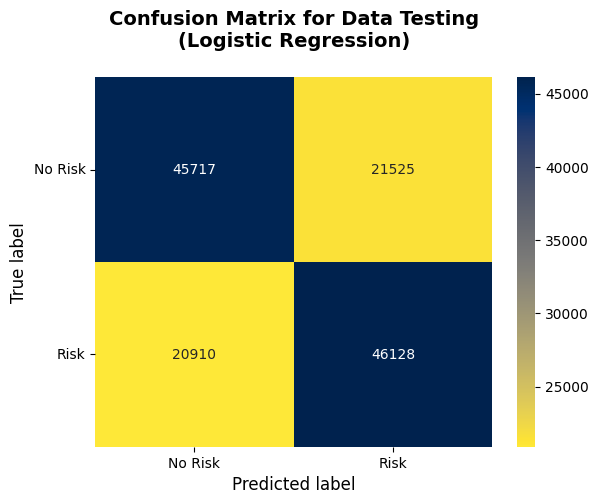

In [162]:
# create confusion matrix as a dataFrame
confusion_matrix_lr = pd.DataFrame((confusion_matrix(y_test, y_pred_lr)), ('No Risk','Risk'),
                                    ('No Risk', 'Risk'))

# plot confusion matrix LR
plt.figure()
heatmap = sns.heatmap(confusion_matrix_lr, annot=True, annot_kws={'size': 10}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)

plt.title('Confusion Matrix for Data Testing\n(Logistic Regression)\n', fontsize=14, color='black', weight='bold')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [163]:
roc_auc_lr = round(roc_auc_score(y_test, y_pred_lr),5)
print('ROC AUC:', roc_auc_lr)

ROC AUC: 0.68399


ML Model 2 (Naive Bayes)

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report


# build model NBC
nb_model = MultinomialNB()

# train and test model
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# show result
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.61      0.66      0.64     67242
           1       0.63      0.58      0.61     67038

    accuracy                           0.62    134280
   macro avg       0.62      0.62      0.62    134280
weighted avg       0.62      0.62      0.62    134280



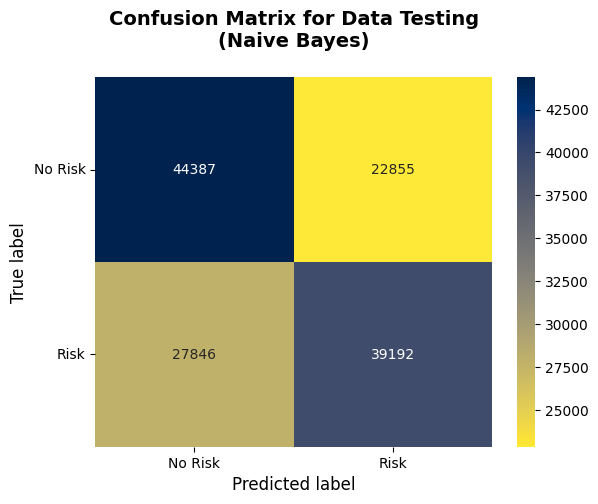

In [165]:
# create confusion matrix as a dataFrame
confusion_matrix_nb = pd.DataFrame((confusion_matrix(y_test, y_pred_nb)), ('No Risk','Risk'),
                                    ('No Risk', 'Risk'))

# plot confusion matrix nb
plt.figure()
heatmap = sns.heatmap(confusion_matrix_nb, annot=True, annot_kws={'size': 10}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)

plt.title('Confusion Matrix for Data Testing\n(Naive Bayes)\n', fontsize=14, color='black', weight='bold')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [166]:
roc_auc_nb = round(roc_auc_score(y_test, y_pred_nb),5)
print('ROC AUC:', roc_auc_nb)

ROC AUC: 0.62237


ML Model 3 (K-Nearest Neighbors)

In [167]:
# build model
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

# train and test data
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# show result
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78     67242
           1       0.73      1.00      0.85     67038

    accuracy                           0.82    134280
   macro avg       0.86      0.82      0.81    134280
weighted avg       0.87      0.82      0.81    134280



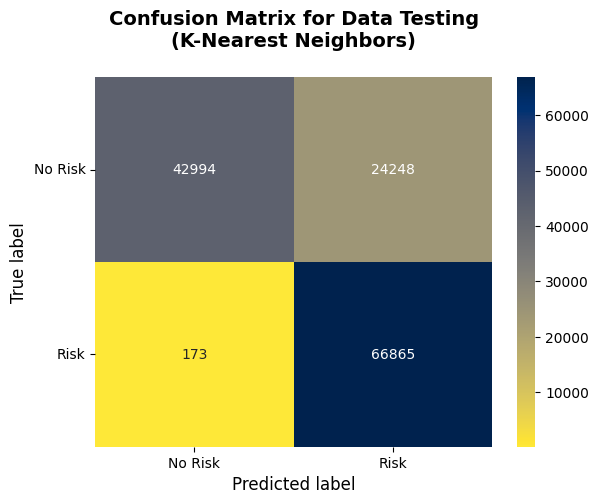

In [168]:
# create confusion matrix as a dataFrame
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_test, y_pred_knn)), ('No Risk','Risk'),
                                    ('No Risk', 'Risk'))

# plot confusion matrix KNN
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 10}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)

plt.title('Confusion Matrix for Data Testing\n(K-Nearest Neighbors)\n', fontsize=14, color='black', weight='bold')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [169]:
roc_auc_knn = round(roc_auc_score(y_test, y_pred_knn),5)
print('ROC AUC:', roc_auc_knn)

ROC AUC: 0.81841


ML Model 4 (Decision Tree)

In [170]:
from sklearn.tree import DecisionTreeClassifier

#Build model
dt_model = DecisionTreeClassifier()

#Train and test data
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

#Show result
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     67242
           1       0.88      0.90      0.89     67038

    accuracy                           0.89    134280
   macro avg       0.89      0.89      0.89    134280
weighted avg       0.89      0.89      0.89    134280



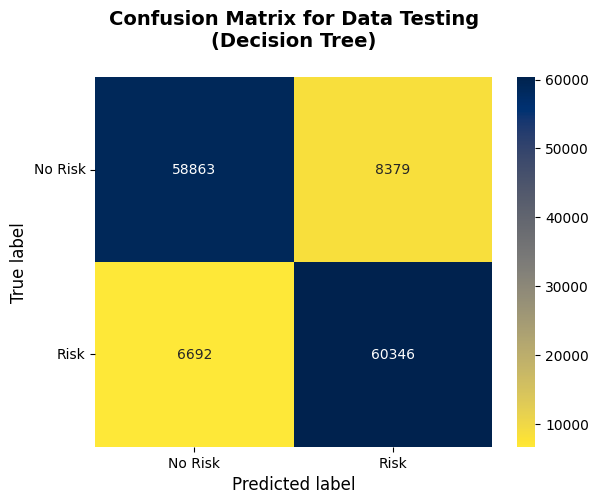

In [171]:
# Create confusion matrix
confusion_matrix_dt = pd.DataFrame(confusion_matrix(y_test, y_pred_dt),
                                   index=['No Risk', 'Risk'], columns=['No Risk', 'Risk'])

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 10}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)

plt.title('Confusion Matrix for Data Testing\n(Decision Tree)\n', fontsize=14, color='black', weight='bold')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [172]:
roc_auc_dt = round(roc_auc_score(y_test, y_pred_dt), 5)
print('Decision Tree ROC AUC:', roc_auc_dt)

Decision Tree ROC AUC: 0.88778


ML Model 5 (random Forest)

In [173]:
from sklearn.ensemble import RandomForestClassifier

#Build model
rf_model = RandomForestClassifier()

#Train and test data
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Show result: Classification report
print("Random Forest - Classification Report")
print(classification_report(y_test, y_pred_rf))

Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     67242
           1       0.99      0.91      0.95     67038

    accuracy                           0.95    134280
   macro avg       0.95      0.95      0.95    134280
weighted avg       0.95      0.95      0.95    134280



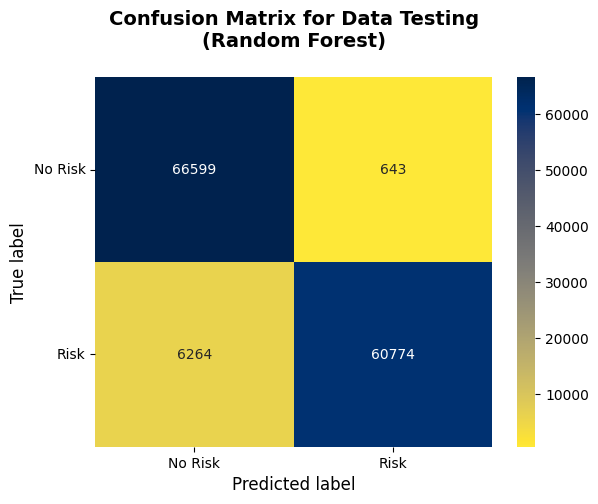

In [174]:
# Create confusion matrix
confusion_matrix_rf = pd.DataFrame(confusion_matrix(y_test, y_pred_rf),
                                   index=['No Risk', 'Risk'], columns=['No Risk', 'Risk'])

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 10}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)

plt.title('Confusion Matrix for Data Testing\n(Random Forest)\n', fontsize=14, color='black', weight='bold')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [175]:
roc_auc_rf = round(roc_auc_score(y_test, y_pred_rf), 5)
print('Random Forest ROC AUC:', roc_auc_rf)

Random Forest ROC AUC: 0.9485


Prediction Result

In [258]:
#import data
df_test = pd.read_csv('/content/application_test.csv')
df_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

In [259]:
df_test.shape

(48744, 121)

In [260]:
#menghapus kolom dengan > 50% data null
def drop_columns(df_test):
  missing_percentage = (df_test.isnull().sum()/len(df_test))*100
  columns_to_drop = missing_percentage[missing_percentage > 50].index
  df_test.drop(columns=columns_to_drop, inplace=True)
  return df_test

df_test = drop_columns(df_test)

In [261]:
df_test.shape

(48744, 92)

In [262]:
def input_missing_value(df_test):
  kolom_missing = df_test.columns[df_test.isnull().any()]

  for i in kolom_missing:
    if df_test[i].dtype == 'object':
      df_test[i].fillna(df_test[i].mode()[0], inplace = True)
    else:
      df_test[i].fillna(df_test[i].median(), inplace = True)
  return df_test

df_test = input_missing_value(df_test)

<ipython-input-262-0f382baa7c31>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test[i].fillna(df_test[i].median(), inplace = True)
<ipython-input-262-0f382baa7c31>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [263]:
df_test.isnull().sum()

SK_ID_CURR                    0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 92, dtype: int64

In [264]:
columns_with_xna_or_unknown = []

for col in df_test.columns:
    if df_test[col].dtype == 'object':
        if df_test[col].isin(['XNA', 'Unknown']).any():
            columns_with_xna_or_unknown.append(col)

print("Kolom yang mengandung 'XNA' atau 'Unknown':")
print(columns_with_xna_or_unknown)

Kolom yang mengandung 'XNA' atau 'Unknown':
['ORGANIZATION_TYPE']


In [265]:
df_test.drop(columns = ['ORGANIZATION_TYPE'])

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0          100001         Cash loans           F            N               Y   
1          100005         Cash loans           M            N               Y   
2          100013         Cash loans           M            Y               Y   
3          100028         Cash loans           F            N               Y   
4          100038         Cash loans           M            Y               N   
...           ...                ...         ...          ...             ...   
48739      456221         Cash loans           F            N               Y   
48740      456222         Cash loans           F            N               N   
48741      456223         Cash loans           F            Y               Y   
48742      456224         Cash loans           M            N               N   
48743      456250         Cash loans           F            Y               N   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 0          135000.0    568800.0      20560.5   
1                 0           99000.0    222768.0      17370.0   
2                 0          202500.0    663264.0      69777.0   
3                 2          315000.0   1575000.0      49018.5   
4                 1          180000.0    625500.0      32067.0   
...             ...               ...         ...          ...   
48739             0          121500.0    412560.0      17473.5   
48740             2          157500.0    622413.0      31909.5   
48741             1          202500.0    315000.0      33205.5   
48742             0          225000.0    450000.0      25128.0   
48743             0          135000.0    312768.0      24709.5   

       AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             450000.0  ...                0                0   
1             180000.0  ...                0                0   
2             630000.0  ...                0                0   
3            1575000.0  ...                0                0   
4             625500.0  ...                0                0   
...                ...  ...              ...              ...   
48739         270000.0  ...                0                0   
48740         495000.0  ...                0                0   
48741         315000.0  ...                0                0   
48742         450000.0  ...                0                0   
48743         270000.0  ...                0                0   

      FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                    0                0                        0.0   
1                    0                0                        0.0   
2                    0                0                        0.0   
3                    0                0                        0.0   
4                    0                0                        0.0   
...                ...              ...                        ...   
48739                0                0                        0.0   
48740                0                0                        0.0   
48741                0                0                        0.0   
48742                0                0                        0.0   
48743                0                0                        0.0   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                            0.0                         0.0   
1                            0.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            0.0                         0.0   
...                          ...                         ...   
48739                        0.0                         0.0   
48740                        0.0                         0.0   
48741                        0.0           

In [266]:
df_test.duplicated().sum()

np.int64(0)

In [267]:
num_test = df_test.select_dtypes(exclude='object')
num_test.head()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0      100001             0          135000.0    568800.0      20560.5   
1      100005             0           99000.0    222768.0      17370.0   
2      100013             0          202500.0    663264.0      69777.0   
3      100028             2          315000.0   1575000.0      49018.5   
4      100038             1          180000.0    625500.0      32067.0   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         450000.0                    0.018850      -19241          -2329   
1         180000.0                    0.035792      -18064          -4469   
2         630000.0                    0.019101      -20038          -4458   
3        1575000.0                    0.026392      -13976          -1866   
4         625500.0                    0.010032      -13040          -2191   

   DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0            -5170.0  ...                 0                 0   
1            -9118.0  ...                 0                 0   
2            -2175.0  ...                 0                 0   
3            -2000.0  ...                 0                 0   
4            -4000.0  ...                 0                 0   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                 0                 0                         0.0   
1                 0                 0                         0.0   
2                 0                 0                         0.0   
3                 0                 0                         0.0   
4                 0                 0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        1.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         0.0  
1                         3.0  
2                         4.0  
3                         3.0  
4                         2.0  

[5 rows x 77 columns]

In [268]:
negative_column = num_test.columns[(num_test < 0).any()].tolist()
num_test[negative_column] = num_test[negative_column] * -1
num_test.head()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0      100001             0          135000.0    568800.0      20560.5   
1      100005             0           99000.0    222768.0      17370.0   
2      100013             0          202500.0    663264.0      69777.0   
3      100028             2          315000.0   1575000.0      49018.5   
4      100038             1          180000.0    625500.0      32067.0   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         450000.0                    0.018850       19241           2329   
1         180000.0                    0.035792       18064           4469   
2         630000.0                    0.019101       20038           4458   
3        1575000.0                    0.026392       13976           1866   
4         625500.0                    0.010032       13040           2191   

   DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0             5170.0  ...                 0                 0   
1             9118.0  ...                 0                 0   
2             2175.0  ...                 0                 0   
3             2000.0  ...                 0                 0   
4             4000.0  ...                 0                 0   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                 0                 0                         0.0   
1                 0                 0                         0.0   
2                 0                 0                         0.0   
3                 0                 0                         0.0   
4                 0                 0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        1.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         0.0  
1                         3.0  
2                         4.0  
3                         3.0  
4                         2.0  

[5 rows x 77 columns]

In [269]:
num_test.describe()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   48744.000000  48744.000000      4.874400e+04  4.874400e+04   
mean   277796.676350      0.397054      1.784318e+05  5.167404e+05   
std    103169.547296      0.709047      1.015226e+05  3.653970e+05   
min    100001.000000      0.000000      2.694150e+04  4.500000e+04   
25%    188557.750000      0.000000      1.125000e+05  2.606400e+05   
50%    277549.000000      0.000000      1.575000e+05  4.500000e+05   
75%    367555.500000      1.000000      2.250000e+05  6.750000e+05   
max    456250.000000     20.000000      4.410000e+06  2.245500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   48744.000000     4.874400e+04                48744.000000   
mean    29424.651219     4.626188e+05                    0.021226   
std     16012.584824     3.367102e+05                    0.014428   
min      2295.000000     4.500000e+04                    0.000253   
25%     17973.000000     2.250000e+05                    0.010006   
50%     26199.000000     3.960000e+05                    0.018850   
75%     37390.500000     6.300000e+05                    0.028663   
max    180576.000000     2.245500e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  \
count  48744.000000   48744.000000       48744.000000  ...      48744.000000   
mean   16068.084605  -67485.366322        4967.652716  ...          0.001559   
std     4325.900393  144348.507136        3552.612035  ...          0.039456   
min     7338.000000 -365243.000000          -0.000000  ...          0.000000   
25%    12496.000000     296.000000        1901.000000  ...          0.000000   
50%    15785.000000    1293.000000        4490.000000  ...          0.000000   
75%    19637.000000    2910.000000        7459.250000  ...          0.000000   
max    25195.000000   17463.000000       23722.000000  ...          1.000000   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count           48744.0           48744.0           48744.0   
mean                0.0               0.0               0.0   
std                 0.0               0.0               0.0   
min                 0.0               0.0               0.0   
25%                 0.0               0.0               0.0   
50%                 0.0               0.0               0.0   
75%                 0.0               0.0               0.0   
max                 0.0               0.0               0.0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                48744.000000               48744.000000   
mean                     0.001846                   0.001580   
std                      0.043406                   0.043179   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   2.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                48744.000000               48744.000000   
mean                     0.002441                   0.008145   
std                      0.050582                   0.103858   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   6.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count               48744.000000                48744.000000  
mean                    0.479033                    1.985783  
std                     0.673449                    1.721001  
min                     0.000000                    0.000000  

In [270]:
#CNT_CHILDREN
num_test = num_test[num_test['CNT_CHILDREN'] <= 5]

#CNT_FAM_MEMBERS
num_test = num_test[num_test['CNT_FAM_MEMBERS'] <= 7 ]

# DAYS_EMPLOYED
num_test = num_test[num_test['DAYS_EMPLOYED'] != -365243]

# AMT_ANNUITY
num_test = num_test[num_test['AMT_ANNUITY'] != 258025.5]

# AMT_INCOME_TOTAL
num_test = num_test[num_test['AMT_INCOME_TOTAL'] != 1.170000e+08]

# OBS_60_CNT_SOCIAL_CIRCLE
num_test = num_test[num_test['OBS_60_CNT_SOCIAL_CIRCLE'] != 344]

# DEF_30_CNT_SOCIAL_CIRCLE
num_test = num_test[num_test['DEF_30_CNT_SOCIAL_CIRCLE'] != 34]

# DEF_60_CNT_SOCIAL_CIRCLE
num_test = num_test[num_test['DEF_60_CNT_SOCIAL_CIRCLE'] != 24]

# AMT_REQ_CREDIT_BUREAU_QRT
num_test = num_test[num_test['AMT_REQ_CREDIT_BUREAU_QRT'] != 261]

In [272]:
num_test.columns[(num_test < 0).any()].tolist()

['REGION_RATING_CLIENT_W_CITY']

In [276]:
df_clean = df_test.loc[num_test.index].copy()

In [279]:
df_test = df_clean.copy()

In [285]:
df_test

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0          100001         Cash loans           F            N               Y   
1          100005         Cash loans           M            N               Y   
2          100013         Cash loans           M            Y               Y   
3          100028         Cash loans           F            N               Y   
4          100038         Cash loans           M            Y               N   
...           ...                ...         ...          ...             ...   
48739      456221         Cash loans           F            N               Y   
48740      456222         Cash loans           F            N               N   
48741      456223         Cash loans           F            Y               Y   
48742      456224         Cash loans           M            N               N   
48743      456250         Cash loans           F            Y               N   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 0          135000.0    568800.0      20560.5   
1                 0           99000.0    222768.0      17370.0   
2                 0          202500.0    663264.0      69777.0   
3                 2          315000.0   1575000.0      49018.5   
4                 1          180000.0    625500.0      32067.0   
...             ...               ...         ...          ...   
48739             0          121500.0    412560.0      17473.5   
48740             2          157500.0    622413.0      31909.5   
48741             1          202500.0    315000.0      33205.5   
48742             0          225000.0    450000.0      25128.0   
48743             0          135000.0    312768.0      24709.5   

       AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             450000.0  ...                0                0   
1             180000.0  ...                0                0   
2             630000.0  ...                0                0   
3            1575000.0  ...                0                0   
4             625500.0  ...                0                0   
...                ...  ...              ...              ...   
48739         270000.0  ...                0                0   
48740         495000.0  ...                0                0   
48741         315000.0  ...                0                0   
48742         450000.0  ...                0                0   
48743         270000.0  ...                0                0   

      FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                    0                0                        0.0   
1                    0                0                        0.0   
2                    0                0                        0.0   
3                    0                0                        0.0   
4                    0                0                        0.0   
...                ...              ...                        ...   
48739                0                0                        0.0   
48740                0                0                        0.0   
48741                0                0                        0.0   
48742                0                0                        0.0   
48743                0                0                        0.0   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                            0.0                         0.0   
1                            0.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            0.0                         0.0   
...                          ...                         ...   
48739                        0.0                         0.0   
48740                        0.0                         0.0   
48741                        0.0           

In [286]:
df_test['AGE'] = np.floor(df_test['DAYS_BIRTH'] / -365).astype(int)
df_test.drop(columns= 'DAYS_BIRTH', inplace=True)

In [287]:
df_copy[features]

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  CNT_CHILDREN  \
0                        0            1             0             0   
1                        0            0             0             0   
2                        1            1             1             0   
3                        0            0             0             0   
4                        0            1             0             0   
...                    ...          ...           ...           ...   
307504                   0            0             0             0   
307506                   0            1             0             0   
307508                   0            0             0             0   
307509                   0            0             0             0   
307510                   0            0             0             0   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  NAME_TYPE_SUITE  \
0               202500.0    406597.5      24700.5                6   
1               270000.0   1293502.5      35698.5                1   
2                67500.0    135000.0       6750.0                6   
3               135000.0    312682.5      29686.5                6   
4               121500.0    513000.0      21865.5                6   
...                  ...         ...          ...              ...   
307504          153000.0    331920.0      16096.5                6   
307506          157500.0    254700.0      27558.0                6   
307508          153000.0    677664.0      29979.0                6   
307509          171000.0    370107.0      20205.0                6   
307510          157500.0    675000.0      49117.5                6   

        NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  ...  FLOORSMAX_AVG  \
0                      6                    4  ...         0.0833   
1                      4                    1  ...         0.2917   
2                      6                    4  ...         0.1667   
3                      6                    4  ...         0.1667   
4                      6                    4  ...         0.1667   
...                  ...                  ...  ...            ...   
307504                 6                    4  ...         0.1667   
307506                 6                    4  ...         0.6042   
307508                 6                    1  ...         0.1667   
307509                 1                    4  ...         0.0417   
307510                 1                    1  ...         0.3750   

        TOTALAREA_MODE  EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
0               0.0149                    0                       2.0   
1               0.0714                    0                       1.0   
2               0.0688                    0                       0.0   
3               0.0688                    0                       2.0   
4               0.0688                    0                       0.0   
...                ...                  ...                       ...   
307504          0.0688                    0                       0.0   
307506          0.2898                    0                       0.0   
307508          0.7970                    0                       6.0   
307509          0.0086                    0                       0.0   
307510          0.0718                    0                       0.0   

        DEF_30_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                            2.0                  1134.0   
1                            0.0                   828.0   
2                            0.0                   815.0   
3                            0.0                   617.0   
4                            0.0                  1106.0   
...                          ...                     ...   
307504                       0.0                     0.0   
307506                       0.0                   273.0   
307508                       0.0                  1909.0   
307509  

In [288]:
train = set(df_copy[features].columns)

In [289]:
train

{'AGE',
 'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_CHILDREN',
 'CODE_GENDER',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'EMERGENCYSTATE_MODE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_EMAIL',
 'FLAG_OWN_CAR',
 'FLAG_PHONE',
 'FLAG_WORK_PHONE',
 'FLOORSMAX_AVG',
 'HOUR_APPR_PROCESS_START',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'REGION_RATING_CLIENT',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'TOTALAREA_MODE',
 'WEEKDAY_APPR_PROCESS_START'}

In [290]:
test = set(df_test.columns)

In [291]:
not_in_test = train - test
not_in_test = list(not_in_test)

In [292]:
not_in_test

[]

In [293]:
df_test[not_in_test] = 0 #mengubah kolom yang tidak ada di test dengan 0

In [294]:
column_train = list(df_copy[features].columns)
df_test = df_test[column_train]

In [295]:
df_test

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  CNT_CHILDREN  \
0             Cash loans           F            N             0   
1             Cash loans           M            N             0   
2             Cash loans           M            Y             0   
3             Cash loans           F            N             2   
4             Cash loans           M            Y             1   
...                  ...         ...          ...           ...   
48739         Cash loans           F            N             0   
48740         Cash loans           F            N             2   
48741         Cash loans           F            Y             1   
48742         Cash loans           M            N             0   
48743         Cash loans           F            Y             0   

       AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY NAME_TYPE_SUITE  \
0              135000.0    568800.0      20560.5   Unaccompanied   
1               99000.0    222768.0      17370.0   Unaccompanied   
2              202500.0    663264.0      69777.0   Unaccompanied   
3              315000.0   1575000.0      49018.5   Unaccompanied   
4              180000.0    625500.0      32067.0   Unaccompanied   
...                 ...         ...          ...             ...   
48739          121500.0    412560.0      17473.5   Unaccompanied   
48740          157500.0    622413.0      31909.5   Unaccompanied   
48741          202500.0    315000.0      33205.5   Unaccompanied   
48742          225000.0    450000.0      25128.0          Family   
48743          135000.0    312768.0      24709.5   Unaccompanied   

           NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  ... FLOORSMAX_AVG  \
0                   Working               Higher education  ...        0.1250   
1                   Working  Secondary / secondary special  ...        0.1667   
2                   Working               Higher education  ...        0.1667   
3                   Working  Secondary / secondary special  ...        0.3750   
4                   Working  Secondary / secondary special  ...        0.1667   
...                     ...                            ...  ...           ...   
48739               Working  Secondary / secondary special  ...        0.1667   
48740  Commercial associate  Secondary / secondary special  ...        0.1667   
48741  Commercial associate  Secondary / secondary special  ...        0.3333   
48742  Commercial associate               Higher education  ...        0.6250   
48743               Working  Secondary / secondary special  ...        0.1667   

       TOTALAREA_MODE  EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
0              0.0392                   No                       0.0   
1              0.0707                   No                       0.0   
2              0.0707                   No                       0.0   
3              0.3700                   No                       0.0   
4              0.0707                   No                       0.0   
...               ...                  ...                       ...   
48739          0.0707                   No                       1.0   
48740          0.0707                   No                       2.0   
48741          0.1663                   No                       0.0   
48742          0.1974                   No                       0.0   
48743          0.0707                   No                       0.0   

       DEF_30_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                           0.0                 -1740.0   
1                           0.0                     0.0   
2                           0.0                  -856.0   
3                           0.0                 -1805.0   
4                           0.0                  -821.0   
...                         ...                     ...   
48739                       0.0                  -684.0   
48740                       0.0                     0.0   
48741          

In [296]:
cat =  df_test.select_dtypes(include='object').columns.tolist()

In [297]:
df_test[cat] = df_test[cat].apply(LabelEncoder().fit_transform)
df_test.head()

<ipython-input-297-2cde6d7adc22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[cat] = df_test[cat].apply(LabelEncoder().fit_transform)


NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  CNT_CHILDREN  \
0                   0            0             0             0   
1                   0            1             0             0   
2                   0            1             1             0   
3                   0            0             0             2   
4                   0            1             1             1   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  NAME_TYPE_SUITE  \
0          135000.0    568800.0      20560.5                6   
1           99000.0    222768.0      17370.0                6   
2          202500.0    663264.0      69777.0                6   
3          315000.0   1575000.0      49018.5                6   
4          180000.0    625500.0      32067.0                6   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  ...  FLOORSMAX_AVG  TOTALAREA_MODE  \
0                 4                    1  ...         0.1250          0.0392   
1                 4                    4  ...         0.1667          0.0707   
2                 4                    1  ...         0.1667          0.0707   
3                 4                    4  ...         0.3750          0.3700   
4                 4                    4  ...         0.1667          0.0707   

   EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                    0                       0.0                       0.0   
1                    0                       0.0                       0.0   
2                    0                       0.0                       0.0   
3                    0                       0.0                       0.0   
4                    0                       0.0                       0.0   

   DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_MON  \
0                 -1740.0                        0.0   
1                     0.0                        0.0   
2                  -856.0                        0.0   
3                 -1805.0                        0.0   
4                  -821.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE  
0                        0.0                         0.0   52  
1                        0.0                         3.0   49  
2                        1.0                         4.0   54  
3                        0.0                         3.0   38  
4                        0.0                         2.0   35  

[5 rows x 35 columns]

In [298]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_test = scaler.fit_transform(df_test)

In [299]:
predictions = rf_model.predict(df_test)

In [300]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [301]:
#memastikan panjang data sama
print(len(predictions),len(df_test))

39458 39458


In [302]:
df_test = pd.DataFrame(df_test)

In [303]:
df_test.columns = column_train
df_test.head()

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  CNT_CHILDREN  \
0                 0.0          0.0           0.0           0.0   
1                 0.0          1.0           0.0           0.0   
2                 0.0          1.0           1.0           0.0   
3                 0.0          0.0           0.0           0.4   
4                 0.0          1.0           1.0           0.2   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  NAME_TYPE_SUITE  \
0          0.024654    0.238037     0.102453              1.0   
1          0.016440    0.080785     0.084558              1.0   
2          0.040054    0.280965     0.378515              1.0   
3          0.065721    0.695297     0.262078              1.0   
4          0.034920    0.263804     0.166995              1.0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  ...  FLOORSMAX_AVG  TOTALAREA_MODE  \
0               1.0                 0.25  ...         0.1250          0.0392   
1               1.0                 1.00  ...         0.1667          0.0707   
2               1.0                 0.25  ...         0.1667          0.0707   
3               1.0                 1.00  ...         0.3750          0.3700   
4               1.0                 1.00  ...         0.1667          0.0707   

   EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                  0.0                       0.0                       0.0   
1                  0.0                       0.0                       0.0   
2                  0.0                       0.0                       0.0   
3                  0.0                       0.0                       0.0   
4                  0.0                       0.0                       0.0   

   DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_MON  \
0                0.601009                        0.0   
1                1.000000                        0.0   
2                0.803715                        0.0   
3                0.586104                        0.0   
4                0.811740                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR       AGE  
0                   0.000000                    0.000000  0.666667  
1                   0.000000                    0.214286  0.604167  
2                   0.142857                    0.285714  0.708333  
3                   0.000000                    0.214286  0.375000  
4                   0.000000                    0.142857  0.312500  

[5 rows x 35 columns]

In [304]:
df_test['TARGET'] = predictions

In [305]:
df_test['TARGET'].value_counts()

TARGET
0    39014
1      444
Name: count, dtype: int64

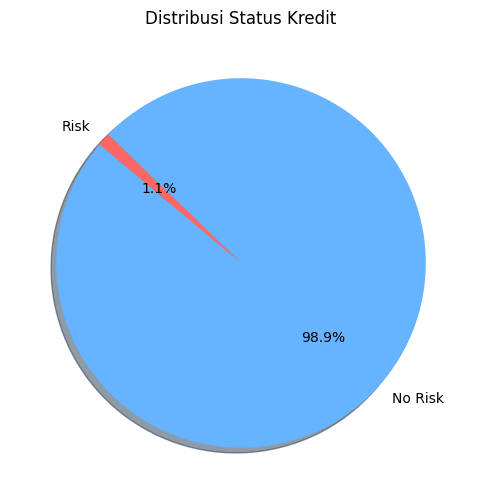

TARGET
0    39014
1      444
Name: count, dtype: int64


In [306]:
target_counts = df_test['TARGET'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(target_counts, labels=['No Risk', 'Risk'], autopct='%1.1f%%', colors=['#66b3ff','#ff6666'], startangle=140, shadow=True)
plt.title('Distribusi Status Kredit')

# Menampilkan plot
plt.show()
print(target_counts)